In [3]:
import islpy as isl
import json

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "../benchmarks/polyhedral/cases/backward.json"

with open(file_path) as f:
    data = json.load(f)

context = isl.Set("{:}")
domain = isl.UnionSet(data["Domain"])
read = isl.UnionMap(data["Read"])
write = isl.UnionMap(data["Write"])

In [3]:
build = isl.AstBuild.from_context(context)
ast = build.node_from_schedule_map(read.intersect_domain(domain))

In [8]:
(619-398)/619

0.3570274636510501

In [4]:
printer = isl.Printer.to_str(build.get_ctx())
printer = printer.set_output_format(isl.format.C)


# Print the AST node.
printer = printer.print_ast_node(ast)
print(printer.get_str())

for (int c0 = 0; c0 <= 4; c0 += 1) {
  if (c0 == 0) {
    for (int c1 = 0; c1 <= 1; c1 += 1)
      S0(c1);
  } else if (c0 % 2 == 0) {
    S0((c0 / 2) - 1);
  }
  for (int c1 = max(0, c0 - 3); c1 <= min(1, c0 - 2); c1 += 1)
    S2(c1);
  if (c0 == 1) {
    for (int c1 = 0; c1 <= 1; c1 += 1)
      S1(c1);
  } else if (c0 >= 2 && c0 % 2 == 0) {
    S1((c0 / 2) - 1);
  }
}



----------------------

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))


from src.qlosure.utils.isl_data_loader import json_file_to_isl,load_backend
from src.qlosure.mapping.routing import POLY_QMAP
from src.qlosure.backend.load_backend import load_backend_edges
from qiskit.providers.fake_provider import Fake127QPulseV1,Fake20QV1
from src.state_of_the_art.pytket import run_pytket
from src.state_of_the_art.sabre import run_sabre
from src.state_of_the_art.qmap import run_qmap
from src.state_of_the_art.cirq import run_cirq
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke

from qiskit import QuantumCircuit
from time import time

-----------------------

In [2]:
file_path = "../benchmarks/polyhedral/queko-bss-54qbt/54QBT_500CYC_QSE_0.json"
data = json_file_to_isl(file_path)
edges = FakeSherbrooke().configuration().coupling_map

In [5]:
poly_mapper = POLY_QMAP(edges, data)

In [6]:
qlosure_results = poly_mapper.run(initial_mapping_method="trivial",verbose=1)

In [7]:
sabre_results = run_sabre(data,edges,layout="trivial")
cirq_results = run_cirq(data,edges,initial_mapping="trivial")
qmap_results = run_qmap(data,edges,initial_mapping="trivial")
pytket_results = run_pytket(data,edges,initial_mapping="trivial")

In [8]:
print(f"sabre         : {sabre_results['swaps'],sabre_results['depth']}")
print(f"qmap          : {qmap_results['swaps'],qmap_results['depth']}")
print(f"tket          : {pytket_results['swaps'],pytket_results['depth']}")
print(f"cirq          : {cirq_results['swaps'],cirq_results['depth']}")
print(f"qlosure       : {qlosure_results[0],qlosure_results[1]}")

qlosure       : (948, 1307)
sabre         : (879, 1339)
qmap          : (1548, 1538)
tket          : (1146, 1378)
cirq          : (1475, 2194)
light qlosure : (947, 1278)


In [60]:
circuits_data = [
    {
        "name":   "Queko_81QBT_900CYC_QSE_0_sherbrooke",
        "qubits": 81,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 27018,  "Δ depth": 9126-900},
            "MQT QMAP":   {"swaps": 43252,  "Δ depth": 8186-900},
            "Cirq":       {"swaps": 27560, "Δ depth": 8593-900},
            "tket":       {"swaps": 32353,  "Δ depth": 13204-900},
            "Qlosure":    {"swaps": 25813,  "Δ depth": 7568-900},
        },
    },
    {
        "name":   "Queko_81QBT_900CYC_QSE_0_ankaa 3",
        "qubits": 81,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 17546,  "Δ depth": 8825-900},
            "MQT QMAP":   {"swaps": 28039,  "Δ depth": 6802-900},
            "Cirq":       {"swaps": 16211, "Δ depth": 7281-900},
            "tket":       {"swaps": 14686,  "Δ depth": 8168-900},
            "Qlosure":    {"swaps": 11690,  "Δ depth": 5005-900},
        },
    },
    {
        "name":   "multiplier_n75_sherbrooke",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 5870,  "Δ depth": 10961-6928},
            "MQT QMAP":   {"swaps": 6390,  "Δ depth": 15667-6928},
            "Cirq":       {"swaps": 6224,  "Δ depth": 12207-6928},
            "tket":       {"swaps": 7416,  "Δ depth": 11936-6928},
            "Qlosure":    {"swaps": 5573,  "Δ depth": 10272-6928},
        },
    },
    {
        "name":   "multiplier_n75_ankaa 3",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 4325,  "Δ depth": 9708-6928},
            "MQT QMAP":   {"swaps": 4995,  "Δ depth": 14261-6928},
            "Cirq":       {"swaps": 4975,  "Δ depth": 11062-6928},
            "tket":       {"swaps": 4221,  "Δ depth": 9936-6928},
            "Qlosure":    {"swaps": 4033,  "Δ depth": 9431-6928},
        },
    },
]

In [1]:
circuits_data = [
    {
        "name":   "Queko_54QBT_900CYC_sherbrooke",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 14491,  "Δ depth": 7342-900},
            "MQT QMAP":   {"swaps": 23427,  "Δ depth": 6613-900},
            "Cirq":       {"swaps": 13797, "Δ depth": 7451-900},
            "tket":       {"swaps": 16073,  "Δ depth": 7873-900},
            "Qlosure":    {"swaps": 10641,  "Δ depth": 5576-900},
        },
    },
    {
        "name":   "Queko_54QBT_900CYC_ankaa 3",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 7413,  "Δ depth": 5744-900},
            "MQT QMAP":   {"swaps": 12683,  "Δ depth": 4594-900},
            "Cirq":       {"swaps": 7396, "Δ depth": 6472-900},
            "tket":       {"swaps": 6380,  "Δ depth": 4840-900},
            "Qlosure":    {"swaps": 5330,  "Δ depth": 4114-900},
        },
    },
    {
        "name":   "multiplier_n75_sherbrooke",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 5870,  "Δ depth": 10961-6928},
            "MQT QMAP":   {"swaps": 6390,  "Δ depth": 11177-6928},
            "Cirq":       {"swaps": 6224,  "Δ depth": 12207-6928},
            "tket":       {"swaps": 7416,  "Δ depth": 11936-6928},
            "Qlosure":    {"swaps": 5573,  "Δ depth": 10272-6928},
        },
    },
    {
        "name":   "multiplier_n75_ankaa 3",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 4325,  "Δ depth": 9708-6928},
            "MQT QMAP":   {"swaps": 4995,  "Δ depth": 10865-6928},
            "Cirq":       {"swaps": 4975,  "Δ depth": 11062-6928},
            "tket":       {"swaps": 4221,  "Δ depth": 9936-6928},
            "Qlosure":    {"swaps": 4033,  "Δ depth": 9431-6928},
        },
    },
]

In [1]:
circuits_data = [
    {
        "name":   "Queko_54QBT_900CYC_sherbrooke",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 14491,  "Δ depth": 7342-900},
            "MQT QMAP":   {"swaps": 23427,  "Δ depth": 6613-900},
            "Cirq":       {"swaps": 13797, "Δ depth": 7451-900},
            "tket":       {"swaps": 16073,  "Δ depth": 7873-900},
            "Qlosure":    {"swaps": 10641,  "Δ depth": 5576-900},
        },
    },
    {
        "name":   "Queko_54QBT_900CYC_ankaa 3",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 7413,  "Δ depth": 5744-900},
            "MQT QMAP":   {"swaps": 12683,  "Δ depth": 4594-900},
            "Cirq":       {"swaps": 7396, "Δ depth": 6472-900},
            "tket":       {"swaps": 6380,  "Δ depth": 4840-900},
            "Qlosure":    {"swaps": 5330,  "Δ depth": 4114-900},
        },
    },
    {
        "name":   "square_root_n18_sherbrooke",
        "qubits": 18,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 857,  "Δ depth": 2309-1129},
            "MQT QMAP":   {"swaps": 855,  "Δ depth": 2406-1129},
            "Cirq":       {"swaps": 1015,  "Δ depth": 2580-1129},
            "tket":       {"swaps": 791,  "Δ depth": 2423-1129},
            "Qlosure":    {"swaps": 704,  "Δ depth": 2091-1129},
        },
    },
    {
        "name":   "square_root_n18_ankaa 3",
        "qubits": 18,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 498,  "Δ depth": 2085-1129},
            "MQT QMAP":   {"swaps": 525,  "Δ depth": 2041-1129},
            "Cirq":       {"swaps": 587,  "Δ depth": 2240-1129},
            "tket":       {"swaps": 467,  "Δ depth": 2101-1129},
            "Qlosure":    {"swaps": 441,  "Δ depth": 2000-1129},
        },
    },
]

In [13]:
(7416-5719)/5719

0.2967301975869907

In [20]:
circuits_data = [
    {
        "name":   "Queko_54QBT_900CYC_sherbrooke",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 14491,  "Δ depth": 7342-900},
            "MQT QMAP":   {"swaps": 23427,  "Δ depth": 6613-900},
            "Cirq":       {"swaps": 13797, "Δ depth": 7451-900},
            "tket":       {"swaps": 16073,  "Δ depth": 7873-900},
            "Qlosure":    {"swaps": 10641,  "Δ depth": 5576-900},
        },
    },
    {
        "name":   "Queko_54QBT_900CYC_ankaa 3",
        "qubits": 54,
        "qops":   34506,
        "results": {
            "LightSABRE": {"swaps": 7413,  "Δ depth": 5744-900},
            "MQT QMAP":   {"swaps": 12683,  "Δ depth": 4594-900},
            "Cirq":       {"swaps": 7396, "Δ depth": 6472-900},
            "tket":       {"swaps": 6380,  "Δ depth": 4840-900},
            "Qlosure":    {"swaps": 5330,  "Δ depth": 4114-900},
        },
    },
    {
        "name":   "square_root_n18_sherbrooke",
        "qubits": 18,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 78,  "Δ depth": 163-108},
            "MQT QMAP":   {"swaps": 63,  "Δ depth": 142-108},
            "Cirq":       {"swaps": 65,  "Δ depth": 131-108},
            "tket":       {"swaps": 60,  "Δ depth": 127-108},
            "Qlosure":    {"swaps": 53,  "Δ depth": 124-108},
        },
    },
    {
        "name":   "square_root_n18_ankaa 3",
        "qubits": 18,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 33,  "Δ depth": 126-108},
            "MQT QMAP":   {"swaps": 33,  "Δ depth": 127-108},
            "Cirq":       {"swaps": 48,  "Δ depth": 126-108},
            "tket":       {"swaps": 48,  "Δ depth": 128-108},
            "Qlosure":    {"swaps": 33,  "Δ depth": 126-108},
        },
    },
]

In [15]:
(185-182)/185

0.016216216216216217

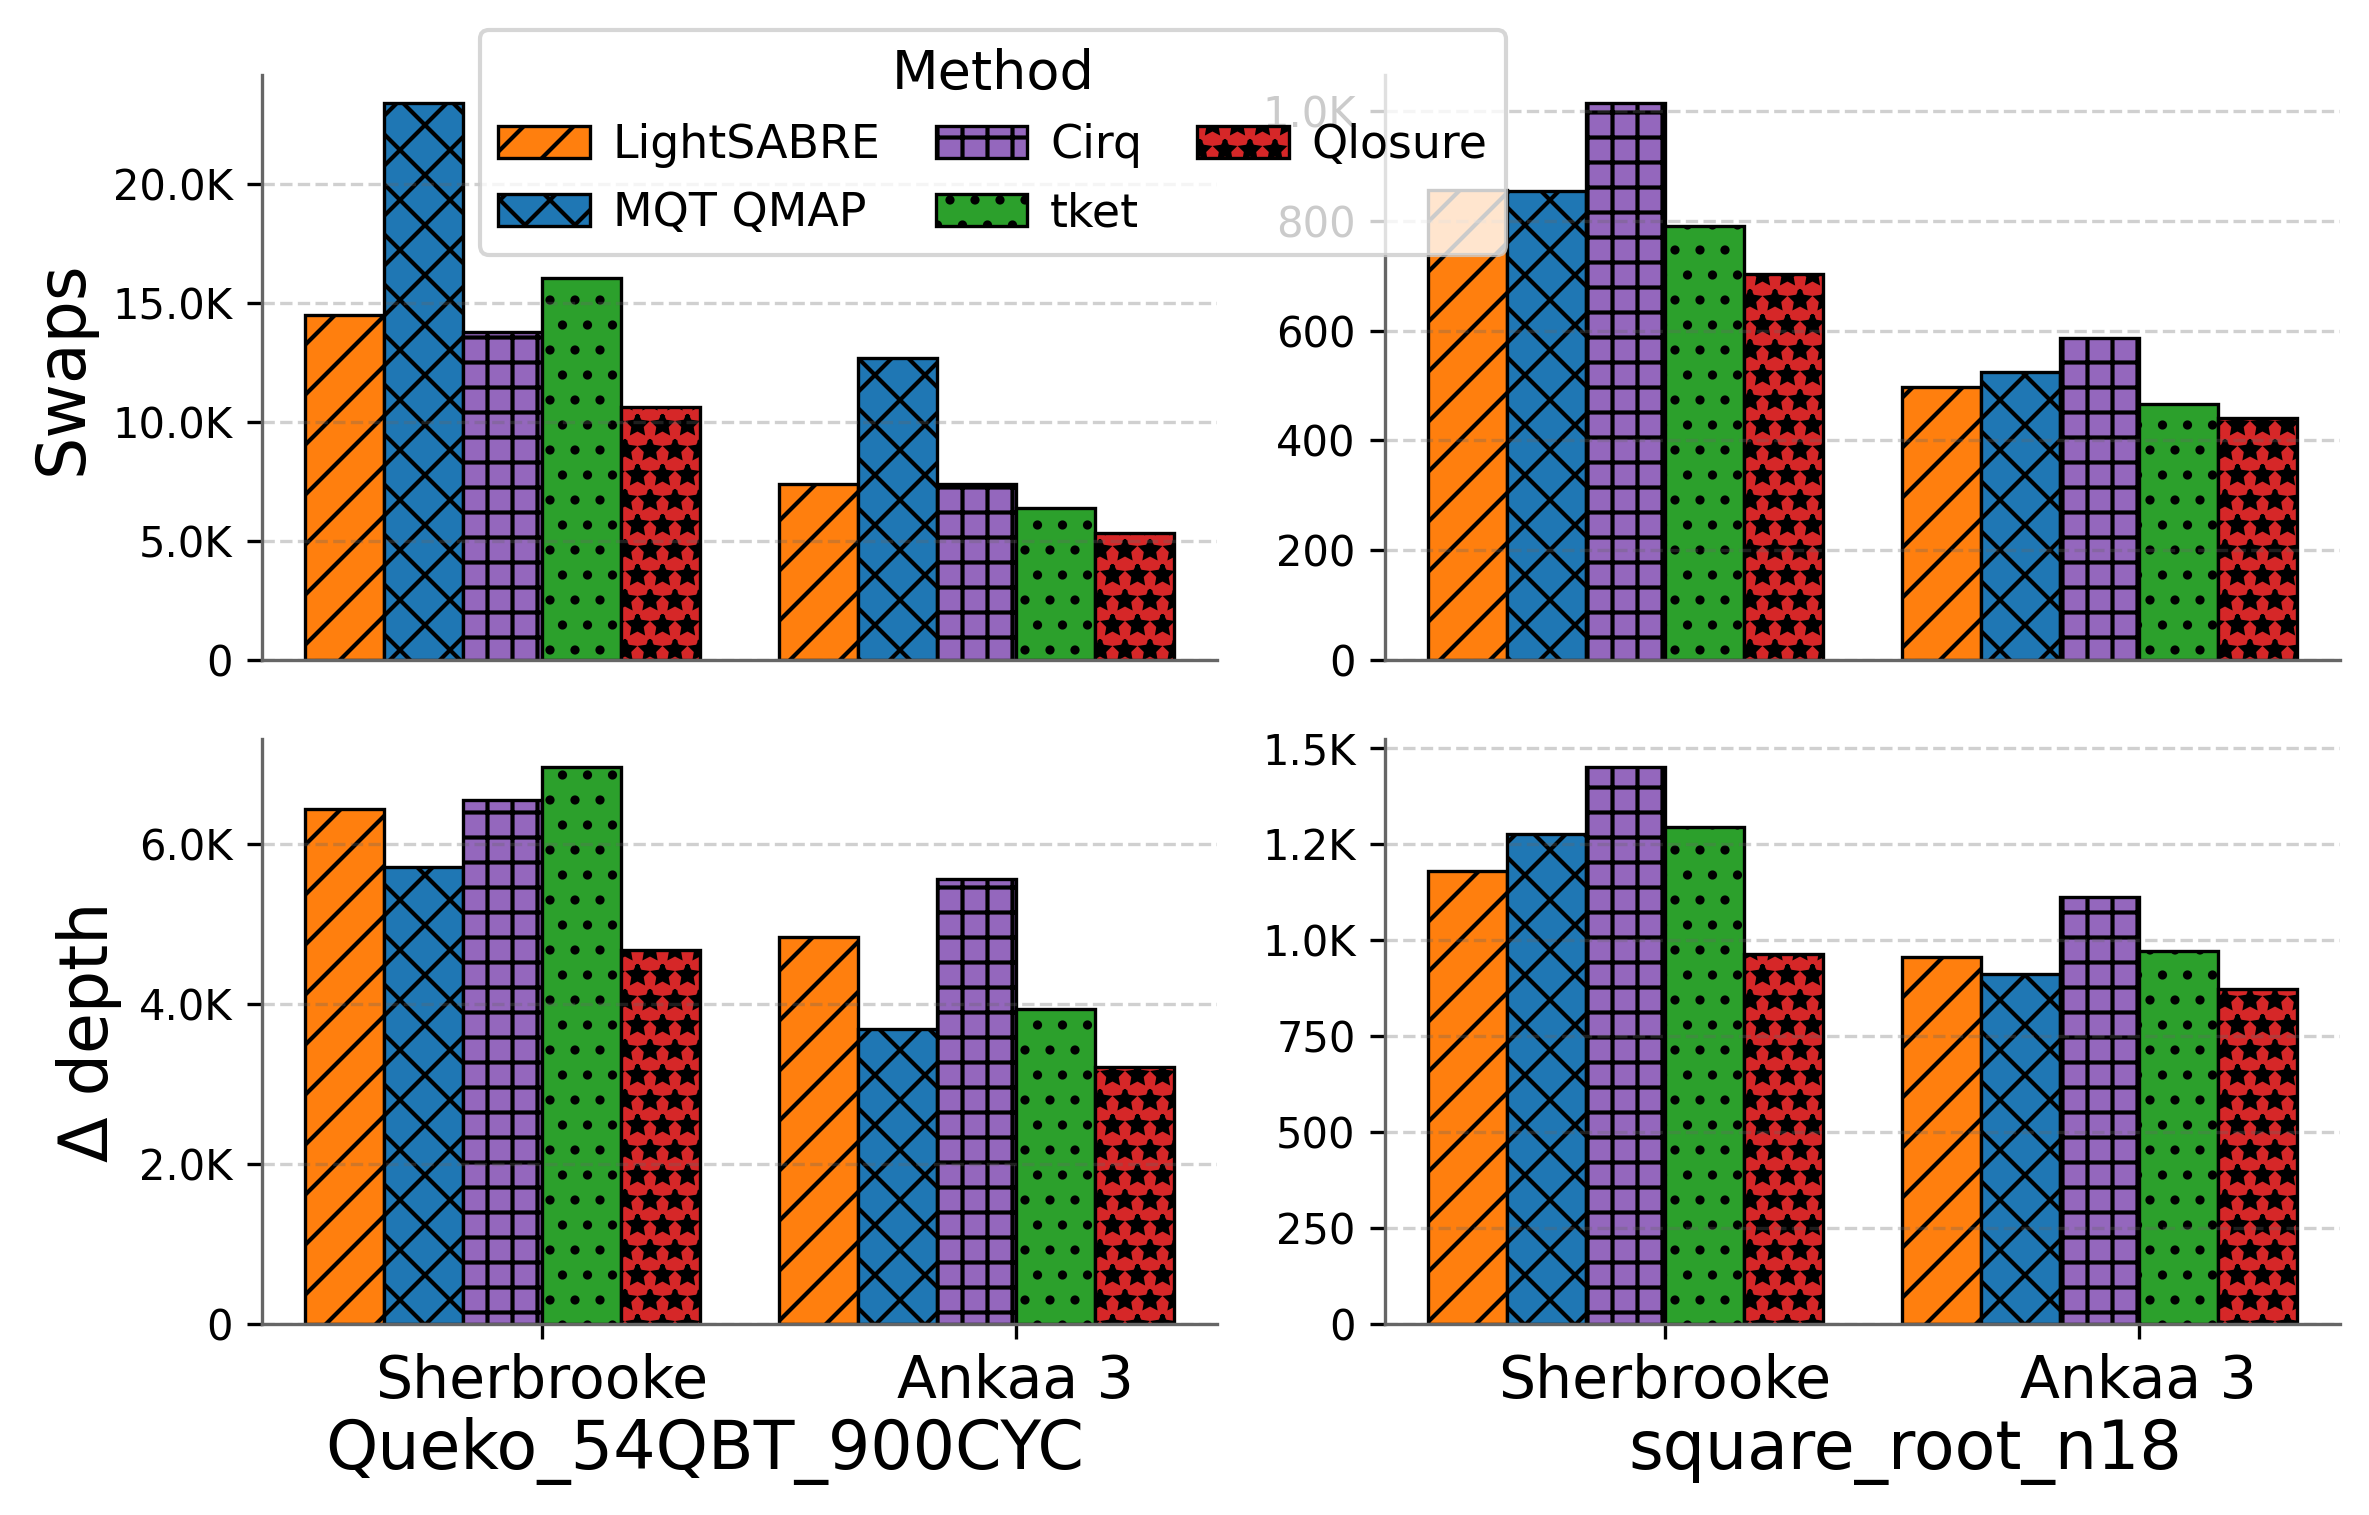

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

colors = {
    "MQT QMAP": "#1f77b4",
    "LightSABRE": "#ff7f0e",
    "tket": "#2ca02c",
    "Cirq": "#9467bd",
    "Qlosure": "#d62728",
}

hatch_patterns = {
    "LightSABRE": "//",
    "MQT QMAP": "xx",
    "Cirq": "++",
    "tket": "..",
    "Qlosure": "**"
}

# Prepare grouping
for entry in circuits_data:
    parts = entry["name"].split("_")
    entry["backend"] = parts[-1] if len(parts) > 1 else ""
    entry["base_name"] = "_".join(parts[:-1]) if len(parts) > 1 else entry["name"]

instance_groups = {}
for d in circuits_data:
    instance_groups.setdefault(d["base_name"], []).append(d)
group_names = list(instance_groups.keys())
methods = list(circuits_data[0]["results"].keys())

width = 0.08
backend_gap = width * 1

def thousands_formatter(x, pos):
    return f'{x/1000:.1f}K' if x >= 1000 else f'{int(x)}'
formatter = FuncFormatter(thousands_formatter)

n_groups = len(group_names)
metrics = ['swaps', 'Δ depth']

fig, axes = plt.subplots(
    nrows=len(metrics),
    ncols=n_groups,
    figsize=(4 * n_groups, 5),
    sharey=False,
    dpi=300,
    facecolor='white'
)

for i, metric in enumerate(metrics):
    for j, group_name in enumerate(group_names):
        ax = axes[i, j]
        ax.set_facecolor('#ffffff')
        ax.yaxis.set_major_formatter(formatter)

        x_start = 0
        for entry in instance_groups[group_name]:
            for m_idx, method in enumerate(methods):
                x = x_start + m_idx * width
                y = entry['results'][method][metric]
                label = method if (i == 0 and j == 0) else None
                ax.bar(
                    x, y, width,
                    label=label,
                    edgecolor='black',
                    facecolor=colors[method],
                    hatch=hatch_patterns[method],
                    linewidth=0.8
                )
            x_start += len(methods) * width + backend_gap

        ax.grid(axis='y', linestyle='--', alpha=0.3, color='#666')
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        ax.spines['left'].set_color('#666')
        ax.spines['bottom'].set_color('#666')

        if metric == 'Δ depth':
            centers = []
            x_start = 0
            for entry in instance_groups[group_name]:
                center = x_start + (len(methods) * width) / 2
                centers.append((entry['backend'], center))
                x_start += len(methods) * width + backend_gap

            ax.set_xticks([c for (_, c) in centers])
            ax.set_xticklabels(
                [b.capitalize() for (b, _) in centers],
                rotation=0, ha='center', fontsize=14
            )
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(metric.capitalize(), fontsize=16)

# ---- single, global legend ----
handles, labels = axes[0, 0].get_legend_handles_labels()
labels = ['LightSABRE', 'MQT QMAP', 'Cirq', 'tket', 'Qlosure']

fig.legend(
    handles, labels,
    title='Method',
    loc='upper center',
    bbox_to_anchor=(0.42, 1),
    ncol=3,
    borderaxespad=0,
    fontsize=11,
    title_fontsize=13,
    columnspacing=1.2,
    handletextpad=0.5
)

# ---- circuit names once under each column ----
for j, group_name in enumerate(group_names):
    xfig = (j + 0.6) / n_groups
    fig.text(
        xfig, 0.03, group_name,
        ha='center', va='bottom',
        fontsize=16
    )

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [ ]:
our_method = "Qlosure"

for circuit in circuits_data:
    name = circuit["name"]
    results = circuit["results"]
    our_swaps = results[our_method]["swaps"]
    our_depth = results[our_method]["depth"]
    print(f"\nCircuit: {name}")
    print("-" * (9 + len(name)))
    
    for method, metrics in results.items():
        if method == our_method:
            continue
        base_swaps = metrics["swaps"]
        base_depth = metrics["depth"]
        
        # compute percent improvements
        swaps_imp = (base_swaps - our_swaps) / our_swaps * 100 if base_swaps else 0
        depth_imp = (base_depth - our_depth) / our_depth * 100 if base_depth else 0
        #swaps_imp = base_swaps / our_swaps
        #depth_imp = base_depth / our_depth
        
        print(f"{method}:")
        print(f"  Swaps improvement: {swaps_imp:.2f}%")
        print(f"  Depth improvement: {depth_imp:.2f}%")

In [86]:
qlosure_results = poly_mapper.run(initial_mapping_method="sabre",heuristic_method="closure",verbose=1)
print("QLosure results:", qlosure_results)
qlosure_results = poly_mapper.run(initial_mapping_method="random",num_iter=5,heuristic_method="closure",verbose=1)
print("QLosure results:", qlosure_results)
qlosure_results = poly_mapper.run(initial_mapping_method="sabre",num_iter=5,heuristic_method="closure",verbose=1)
print("QLosure results:", qlosure_results)

QLosure results: (17, 320, 0.022961139678955078)


QLosure results: (242, 437, 0.2236158847808838)


QLosure results: (17, 320, 0.026724576950073242)


In [100]:
sabre_results = run_sabre(data,edges,layout="trivial")
print(sabre_results)
start = time()

qmap_results = run_qmap(data,edges,initial_mapping="trivial")
print(qmap_results)

cirq_results = run_cirq(data,edges,initial_mapping="trivial")
print(cirq_results)

pytket_results = run_pytket(data,edges,initial_mapping="trivial")
print(pytket_results)

{'swap_count': 857, 'circuit_depth': 2309, 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x789698767880>}
{'swaps': 827, 'depth': 2406, 'cx_count': 898}
{'swaps': 1015, 'depth': 2580, 'cx_count': 898}
{'swaps': 791, 'depth': 2423, 'circ': [Rz(0.5) q[0]; Rz(0.5) q[1]; Rz(0.5) q[2]; Rz(0.5) q[3]; Rz(0.5) q[4]; Rz(0.5) q[5]; SWAP q[8], q[7]; SWAP q[10], q[9]; Rz(0.5) q[13]; Rz(0.5) q[14]; Rz(0.5) q[15]; Rz(0.5) q[16]; Rz(0.5) q[17]; SX q[0]; SX q[1]; SX q[2]; SX q[3]; SX q[4]; SX q[5]; SWAP q[9], q[8]; SX q[13]; SX q[14]; SX q[15]; SX q[16]; SX q[17]; Rz(0.5) q[0]; Rz(0.5) q[1]; Rz(0.5) q[2]; Rz(0.5) q[3]; Rz(0.5) q[4]; Rz(0.5) q[5]; Rz(0.5) q[13]; Rz(0.5) q[14]; Rz(0.5) q[15]; Rz(0.5) q[16]; Rz(0.5) q[17]; SWAP q[0], q[1]; SWAP q[2], q[3]; SWAP q[6], q[5]; SWAP q[13], q[12]; SWAP q[5], q[4]; SWAP q[7], q[6]; SWAP q[12], q[11]; SWAP q[4], q[3]; SWAP q[6], q[5]; SWAP q[8], q[7]; SWAP q[11], q[10]; SWAP q[3], q[2]; SWAP q[5], q[4]; SWAP q[10], q[9]; CX q[1], q[2]; SWAP 

In [102]:
qmap_results = run_qmap(data,edges,initial_mapping="trivial")

In [103]:
qmap_results

{'swaps': 518, 'depth': 2041, 'cx_count': 898}

In [63]:
qc = QuantumCircuit.from_qasm_str(data["qasm_code"])
from mqt import qmap

edges_arch = {(u, v) for u, v in edges} | {(v, u) for u, v in edges}
arch = qmap.Architecture(127, edges_arch)
qc_mapped, res = qmap.compile(qc, arch, method="heuristic",initial_layout=qmap.InitialLayout.identity,pre_mapping_optimizations=False,  post_mapping_optimizations=False)


In [64]:
qc.depth(),qc_mapped.depth()

(900, 5484)

In [35]:
qc_mapped.count_ops()

OrderedDict([('h', 12052),
             ('rz', 8532),
             ('cx', 6510),
             ('swap', 6390),
             ('sx', 718),
             ('measure', 75),
             ('x', 7),
             ('barrier', 1)])

In [36]:
qc.count_ops()

OrderedDict([('rz', 8532), ('cx', 6510), ('sx', 718), ('x', 7)])

In [30]:
res.output.cnots

25396

In [26]:
run_pytket(data,edges,initial_mapping="trivial")

{'swaps': 6380,
 'depth': 4840,
 'circ': [X q[0]; X q[1]; X q[3]; X q[5]; X q[7]; X q[9]; X q[11]; X q[12]; X q[14]; X q[16]; X q[20]; X q[23]; X q[24]; X q[25]; X q[28]; X q[29]; X q[30]; X q[31]; X q[33]; X q[34]; X q[36]; X q[38]; X q[41]; X q[42]; X q[44]; X q[45]; X q[46]; X q[47]; SWAP q[50], q[49]; X q[51]; X q[52]; X q[53]; X q[0]; X q[1]; X q[3]; X q[5]; X q[9]; X q[11]; X q[12]; X q[14]; X q[16]; X q[20]; X q[23]; X q[24]; X q[28]; X q[29]; X q[30]; X q[31]; X q[33]; X q[36]; X q[38]; X q[41]; X q[45]; X q[46]; SWAP q[49], q[48]; X q[51]; X q[52]; X q[0]; X q[1]; X q[3]; X q[5]; X q[11]; X q[14]; X q[16]; X q[20]; X q[23]; X q[29]; X q[30]; X q[33]; X q[38]; X q[41]; X q[45]; X q[51]; SWAP q[53], q[52]; X q[0]; X q[1]; X q[3]; SWAP q[10], q[11]; SWAP q[13], q[20]; X q[14]; X q[16]; X q[23]; X q[29]; X q[33]; X q[38]; X q[45]; SWAP q[51], q[52]; X q[1]; SWAP q[6], q[13]; SWAP q[10], q[9]; X q[14]; X q[16]; SWAP q[20], q[27]; X q[23]; SWAP q[26], q[33]; X q[29]; X q[38]; X q[45

In [51]:
# Define each circuit’s data in one place:
circuits_data_sherbrooke = [
    {
        "name":   "square_root_n18",
        "qubits": 18,
        "qops":   2774,
        "results": {
            "LightSABRE": {"swaps": 857,  "depth": 2309},
            "MQT QMAP":   {"swaps": 855,  "depth": 2855},
            "Cirq":       {"swaps": 1015, "depth": 2580},
            "tket":       {"swaps": 791,  "depth": 2423},
            "Qlosure":    {"swaps": 691,  "depth": 2191},
        },
    },
    {
        "name":   "qram_n20",
        "qubits": 20,
        "qops":   346,
        "results": {
            "LightSABRE": {"swaps": 154,  "depth": 266},
            "MQT QMAP":   {"swaps": 173,  "depth": 438},
            "Cirq":       {"swaps": 175,  "depth": 305},
            "tket":       {"swaps": 176,  "depth": 292},
            "Qlosure":    {"swaps": 145,  "depth": 266},
        },
    },
    {
        "name":   "cat_n35",
        "qubits": 35,
        "qops":   37,
        "results": {
            "LightSABRE": {"swaps": 49,  "depth": 74},
            "MQT QMAP":   {"swaps": 48,  "depth": 115},
            "Cirq":       {"swaps": 49,  "depth": 74},
            "tket":       {"swaps": 53,  "depth": 75},
            "Qlosure":    {"swaps": 48,  "depth": 74},
        },
    },
    {
        "name":   "multiplier_n45",
        "qubits": 45,
        "qops":   5571,
        "results": {
            "LightSABRE": {"swaps": 2318,  "depth": 3810},
            "MQT QMAP":   {"swaps": 2529,  "depth": 6047},
            "Cirq":       {"swaps": 2060,  "depth": 4250},
            "tket":       {"swaps": 2355,  "depth": 3981},
            "Qlosure":    {"swaps": 1923,  "depth": 3679},
        },
    },
    
    {
        "name":   "multiplier_n75",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 5870,  "depth": 10961},
            "MQT QMAP":   {"swaps": 6390,  "depth": 15667},
            "Cirq":       {"swaps": 6224,  "depth": 12207},
            "tket":       {"swaps": 7416,  "depth": 11936},
            "Qlosure":    {"swaps": 5719,  "depth": 10113},
        },
    },
    
    {
        "name":   "adder_n64",
        "qubits": 64,
        "qops":   1156,
        "results": {
            "LightSABRE": {"swaps": 593,  "depth": 749},
            "MQT QMAP":   {"swaps": 582,  "depth": 1233},
            "Cirq":       {"swaps": 666,  "depth": 920},
            "tket":       {"swaps": 607,  "depth": 831},
            "Qlosure":    {"swaps": 598,  "depth": 663},
        },
    },
    {
        "name":   "qram_n20",
        "qubits": 20,
        "qops":   346,
        "results": {
            "LightSABRE": {"swaps": 154,  "depth": 266},
            "MQT QMAP":   {"swaps": 173,  "depth": 438},
            "Cirq":       {"swaps": 175,  "depth": 305},
            "tket":       {"swaps": 176,  "depth": 292},
            "Qlosure":    {"swaps": 145,  "depth": 266},
        },
    },

]


In [48]:
plot_res(circuits_data_sherbrooke)

LightSABRE        MQT QMAP           Cirq  \
            Circuit Qubits   QOPs      Swaps  Depth    Swaps  Depth   Swaps   
0   square_root_n18     18   2774        857   2309      855   2855  1015.0   
1          qram_n20     20    346        154    266      173    438   175.0   
2           cat_n35     35     37         49     74       48    115    49.0   
3         qugan_n39     40   1036        197    416      193    849     inf   
4    multiplier_n45     45   5571       2318   3810     2529   6047  2060.0   
5         qugan_n71     72   1932        525   1366      530   1565   631.0   
6    multiplier_n75     75  15767       5870  10961     6390  15667  6224.0   
7    multiplier_n15     15    560        144    357      144    499   159.0   
8         adder_n64     64   1156        593    749      582   1233   666.0   
9            bv_n70     70    453        156    160       99    152    99.0   
10         qram_n20     20    346        154    266      173    438   175.0   

             tket        Qlosure        Improvement           
      Depth Swaps  Depth   Swaps  Depth       Swaps    Depth  
0    2580.0   791   2423     691   2191      14.47%    5.39%  
1     305.0   176    292     145    266       6.21%    0.00%  
2      74.0    53     75      48     74       0.00%    0.00%  
3       inf   185    473     182    347       1.65%   19.88%  
4    4250.0  2355   3981    1923   3679       7.12%    3.56%  
5     933.0   649   1292     558    904      -5.91%    3.21%  
6   12207.0  7416  11936    5719  10113       2.64%    8.39%  
7     416.0   171    358     144    365       0.00%   -2.19%  
8     920.0   607    831     598    663      -2.68%   12.97%  
9     211.0   100    181      99    177       0.00%  -14.12%  
10    305.0   176    292     145    266       6.21%    0.00%

In [ ]:
# Define each circuit’s data in one place:
circuits_data_ankaa = [
    {
        "name":   "square_root_n18",
        "qubits": 18,
        "qops":   2774,
        "results": {
            "LightSABRE": {"swaps": 497,  "depth": 2029},
            "MQT QMAP":   {"swaps": 525,  "depth": 2514},
            "Cirq":       {"swaps": 587, "depth": 2240},
            "tket":       {"swaps": 467,  "depth": 2101},
            "Qlosure":    {"swaps": 488,  "depth": 1952},
        },
    },
    {
        "name":   "qram_n20",
        "qubits": 20,
        "qops":   346,
        "results": {
            "LightSABRE": {"swaps": 80,  "depth": 231},
            "MQT QMAP":   {"swaps": 78,  "depth": 312},
            "Cirq":       {"swaps": 102,  "depth": 258},
            "tket":       {"swaps": 81,  "depth": 222},
            "Qlosure":    {"swaps": 70,  "depth": 213},
        },
    },
    {
        "name":   "cat_n35",
        "qubits": 35,
        "qops":   37,
        "results": {
            "LightSABRE": {"swaps": 27,  "depth": 63},
            "MQT QMAP":   {"swaps": 26,  "depth": 64},
            "Cirq":       {"swaps": 26,  "depth": 63},
            "tket":       {"swaps": 27,  "depth": 63},
            "Qlosure":    {"swaps": 26,  "depth": 63},
        },
    },
    {
        "name":   "qugan_n39",
        "qubits": 40,
        "qops":   1036,
        "results": {
            "LightSABRE": {"swaps": 164,  "depth": 578},
            "MQT QMAP":   {"swaps": 157,  "depth": 739},
            "Cirq":       {"swaps": 185,  "depth": 428},
            "tket":       {"swaps": 160,  "depth": 456},
            "Qlosure":    {"swaps": 149,  "depth": 398},
        },
    },
    {
        "name":   "multiplier_n45",
        "qubits": 45,
        "qops":   5571,
        "results": {
            "LightSABRE": {"swaps": 1416,  "depth": 3580},
            "MQT QMAP":   {"swaps": 1406,  "depth": 4746},
            "Cirq":       {"swaps": 1674,  "depth": 3866},
            "tket":       {"swaps": 1515,  "depth": 3531},
            "Qlosure":    {"swaps": 1293,  "depth": 3262},
        },
    },
    {
        "name":   "qugan_n71",
        "qubits": 72,
        "qops":   1932,
        "results": {
            "LightSABRE": {"swaps": 465,  "depth": 916},
            "MQT QMAP":   {"swaps": 310,  "depth": 1065},
            "Cirq":       {"swaps": 433,  "depth": 814},
            "tket":       {"swaps": 427,  "depth": 923},
            "Qlosure":    {"swaps": 367,  "depth": 803},
        },
    },
    {
        "name":   "multiplier_n75",
        "qubits": 75,
        "qops":   15767,
        "results": {
            "LightSABRE": {"swaps": 4325,  "depth": 9708},
            "MQT QMAP":   {"swaps": 4995,  "depth": 14261},
            "Cirq":       {"swaps": 4975,  "depth": 11062},
            "tket":       {"swaps": 4221,  "depth": 9936},
            "Qlosure":    {"swaps": 4178,  "depth": 9244},
        },
    },
    {
        "name":   "qft_n63",
        "qubits": 63,
        "qops":   8689,
        "results": {
            "LightSABRE": {"swaps": 1705,  "depth": 1952},
            "MQT QMAP":   {"swaps": 2196,  "depth": 9040},
            "Cirq":       {"swaps": 2136,  "depth": 1272},
            "tket":       {"swaps": 1837,  "depth": 1950},
            "Qlosure":    {"swaps": 1549,  "depth": 1713},
        },
    },
    {
        "name":   "qft_n29",
        "qubits": 29,
        "qops":   2117,
        "results": {
            "LightSABRE": {"swaps": 416,  "depth": 722},
            "MQT QMAP":   {"swaps": 451,  "depth": 1932},
            "Cirq":       {"swaps": 443,  "depth": 430},
            "tket":       {"swaps": 450,  "depth": 575},
            "Qlosure":    {"swaps": 378,  "depth": 545},
        },
    },
    {
        "name":   "knn_n67",
        "qubits": 67,
        "qops":   930,
        "results": {
            "LightSABRE": {"swaps": 217,  "depth": 448},
            "MQT QMAP":   {"swaps": 210,  "depth": 605},
            "Cirq":       {"swaps": 297,  "depth": 533},
            "tket":       {"swaps": 211,  "depth": 449},
            "Qlosure":    {"swaps": 210,  "depth": 449},
        },
    },
    {
        "name":   "knn_n31",
        "qubits": 31,
        "qops":   426,
        "results": {
            "LightSABRE": {"swaps": 73,  "depth": 204},
            "MQT QMAP":   {"swaps": 70,  "depth": 273},
            "Cirq":       {"swaps": 87,  "depth": 235},
            "tket":       {"swaps": 63,  "depth": 209},
            "Qlosure":    {"swaps": 63,  "depth": 202},
        },
    },
    {
        "name":   "multiplier_n15",
        "qubits": 15,
        "qops":   560,
        "results": {
            "LightSABRE": {"swaps": 113,  "depth": 335},
            "MQT QMAP":   {"swaps": 131,  "depth": 513},
            "Cirq":       {"swaps": 131,  "depth": 395},
            "tket":       {"swaps": 121,  "depth": 357},
            "Qlosure":    {"swaps": 108,  "depth": 328},
        },
    },
    {
        "name":   "adder_n64",
        "qubits": 64,
        "qops":   1156,
        "results": {
            "LightSABRE": {"swaps": 356,  "depth": 575},
            "MQT QMAP":   {"swaps": 346,  "depth": 970},
            "Cirq":       {"swaps": 542,  "depth": 785},
            "tket":       {"swaps": 315,  "depth": 602},
            "Qlosure":    {"swaps": 303,  "depth": 566},
        },
    },
    {
        "name":   "bv_n70",
        "qubits": 70,
        "qops":   453,
        "results": {
            "LightSABRE": {"swaps": 70,  "depth": 117},
            "MQT QMAP":   {"swaps": 51,  "depth": 119},
            "Cirq":       {"swaps": 51,  "depth": 149},
            "tket":       {"swaps": 56,  "depth": 115},
            "Qlosure":    {"swaps": 49,  "depth": 114},
        },
    },
    {
        "name":   "qram_n20",
        "qubits": 20,
        "qops":   346,
        "results": {
            "LightSABRE": {"swaps": 80,  "depth": 231},
            "MQT QMAP":   {"swaps": 78,  "depth": 312},
            "Cirq":       {"swaps": 102,  "depth": 258},
            "tket":       {"swaps": 81,  "depth": 222},
            "Qlosure":    {"swaps": 70,  "depth": 213},
        },
    },
]


In [ ]:
plot_res(circuits_data_ankaa)

LightSABRE       MQT QMAP         Cirq  \
            Circuit Qubits   QOPs      Swaps Depth    Swaps  Depth Swaps   
0   square_root_n18     18   2774        497  2029      525   2514   587   
1          qram_n20     20    346         80   231       78    312   102   
2           cat_n35     35     37         27    63       26     64    26   
3         qugan_n39     40   1036        164   578      157    739   185   
4    multiplier_n45     45   5571       1416  3580     1406   4746  1674   
5         qugan_n71     72   1932        465   916      310   1065   433   
6    multiplier_n75     75  15767       4325  9708     4995  14261  4975   
7           qft_n63     63   8689       1705  1952     2196   9040  2136   
8           qft_n29     29   2117        416   722      451   1932   443   
9           knn_n67     67    930        217   448      210    605   297   
10          knn_n31     31    426         73   204       70    273    87   
11   multiplier_n15     15    560        113   335      131    513   131   
12        adder_n64     64   1156        356   575      346    970   542   
13           bv_n70     70    453         70   117       51    119    51   
14         qram_n20     20    346         80   231       78    312   102   

           tket       Qlosure       Improvement           
    Depth Swaps Depth   Swaps Depth       Swaps    Depth  
0    2240   467  2101     488  1952      -4.30%    3.94%  
1     258    81   222      70   213      11.43%    4.23%  
2      63    27    63      26    63       0.00%    0.00%  
3     428   160   456     149   398       5.37%    7.54%  
4    3866  1515  3531    1293  3262       8.74%    8.25%  
5     814   427   923     367   803     -15.53%    1.37%  
6   11062  4221  9936    4178  9244       1.03%    5.02%  
7    1272  1837  1950    1549  1713      10.07%  -25.74%  
8     430   450   575     378   545      10.05%  -21.10%  
9     533   211   449     210   449       0.00%   -0.22%  
10    235    63   209      63   202       0.00%    0.99%  
11    395   121   357     108   328       4.63%    2.13%  
12    785   315   602     303   566       3.96%    1.59%  
13    149    56   115      49   114       4.08%    0.88%  
14    258    81   222      70   213      11.43%    4.23%

In [54]:
import pandas as pd

# Data definition
data = [
    #("square_root_n18", 497,2029, 525,2514, 587,2240, 467,2101, 488,1952),
    ("qram_n20",        80, 231,   78, 312,   102,258,  81, 222,   70, 213),
    ("cat_n35",         27,  63,    26,  64,    26, 63,   27,  63,    26,  63),
    ("qugan_n39",       164,578,  157,739,  185,428, 160,456,  149,398),
    ("multiplier_n45",  1416,3580,1406,4746,1674,3866,1515,3531,1293,3262),
    #("qugan_n71",       465,916,  310,1065, 433,814, 427,923,  367,803),
    ("multiplier_n75",  4325,9708,4995,14261,4975,11062,4221,9936,4178,9244),
    #("qft_n63",         1705,1952,2196,9040,2136,1272,1837,1950,1549,1713),
    #("qft_n29",         416,722,  451,1932,  443,430, 450,575,  378,545),
    ("knn_n67",         217,448,  210,605,  297,533, 211,449,  210,449),
    ("knn_n31",         73, 204,   70,273,   87,235,  63,209,   63,202),
    ("multiplier_n15",  113,335,  131,513,  131,395, 121,357,  108,328),
    ("adder_n64",       356,575,  346,970,  542,785, 315,602,  303,566),
    ("bv_n70",          70,117,   51,119,   51,149,  56,115,   49,114),
]

cols = ["Circuit",
        "LS_swaps","LS_depth",
        "QMAP_swaps","QMAP_depth",
        "Cirq_swaps","Cirq_depth",
        "tket_swaps","tket_depth",
        "Qlosure_swaps","Qlosure_depth"]

df = pd.DataFrame(data, columns=cols)

# Compute improvement per method
methods = ["LS", "QMAP", "Cirq", "tket"]
records = []
for m in methods:
    swaps_imp = ((df[f"{m}_swaps"]-df["Qlosure_swaps"]) / df[f"{m}_swaps"]).mean()
    depth_imp = ((df[f"{m}_depth"]-df["Qlosure_depth"]) / df[f"{m}_depth"]).mean()
    name = {
        "LS": "LightSABRE",
        "QMAP": "MQT QMAP",
        "Cirq": "Cirq",
        "tket": "tket"
    }[m]
    records.append({"Method": name, "Avg Swaps Improvement": swaps_imp, "Avg Depth Improvement": depth_imp})

result_df = pd.DataFrame(records)

result_df

,Method,Avg Swaps Improvement,Avg Depth Improvement
0,LightSABRE,0.103672,0.059572
1,MQT QMAP,0.083652,0.279591
2,Cirq,0.212066,0.154662
3,tket,0.067358,0.049678


In [32]:
import pandas as pd
from IPython.display import display



def plot_res(circuits_data):
    rows = []
    for circ in circuits_data:
        # compute best‐other and improvements for Qlosure
        us     = circ["results"]["Qlosure"]
        others = {k: v for k,v in circ["results"].items() if k!="Qlosure"}
        best_other = {
            "swaps": min(v["swaps"]  for v in others.values()),
            "depth": min(v["depth"]  for v in others.values()),
        }
        improvement = {
            "swaps": (best_other["swaps"] - us["swaps"])  / us["swaps"],
            "depth": (best_other["depth"] - us["depth"]) / us["depth"],
        }

        # start building the flat dict for this row
        row = {
            ("",           "Circuit"):    circ["name"],
            ("",           "Qubits"):     circ["qubits"],
            ("",           "QOPs"):       circ["qops"],
        }
        # fill in each tool’s swaps/depth
        for tool, vals in circ["results"].items():
            row[(tool, "Swaps")] = vals["swaps"]
            row[(tool, "Depth")] = vals["depth"]
        # add improvements
        row[("Improvement", "Swaps")] = improvement["swaps"]
        row[("Improvement", "Depth")] = improvement["depth"]

        rows.append(row)

    # Create the MultiIndex DataFrame
    col_index = pd.MultiIndex.from_tuples(rows[0].keys())
    df = pd.DataFrame(
        [list(r.values()) for r in rows],
        columns=col_index
    )

    # format improvements as percentages
    df[("Improvement","Swaps")] = df[("Improvement","Swaps")].map("{:.2%}".format)
    df[("Improvement","Depth")] = df[("Improvement","Depth")].map("{:.2%}".format)

    # display
    display(df)


In [ ]:
poly_mapper = POLY_QMAP(edges, data)
qlosure_results = poly_mapper.run(verbose=1)
print("QLosure results:", qlosure_results)
qlosure_results = poly_mapper.run(heuristic_method="dep_weighted",verbose=1)
print("QLosure results:", qlosure_results)  
qlosure_results = poly_mapper.run(heuristic_method="distance_only",verbose=1)
print("QLosure results:", qlosure_results)

QLosure results: (2636, 1757, 19.65196204185486)


QLosure results: (2651, 2125, 10.306026220321655)


QLosure results: (2456, 1871, 3.9491987228393555)


In [ ]:
poly_mapper.run(verbose=1,num_iter=1,param=2,initial_mapping_method="trivial",heuristic_method="dep_weighted")

(2639, 1685, 6.034891605377197)

In [ ]:
poly_mapper.run(verbose=1,num_iter=3,param=3)

(2342, 1505, 12.750664710998535)

In [ ]:
sabre_results = run_sabre(data,edges)
print(f"sabre swaps {sabre_results['swap_count']} , depth :{sabre_results['circuit_depth']}")
pytket_results = run_pytket(data,edges)
print(f"pytket swaps {pytket_results['swaps']} , depth :{pytket_results['depth']}")
qmap_results = run_qmap(data,edges)
print(f"qmap swaps {qmap_results['swaps']} , depth :{qmap_results['depth']}")
qmap_results = run_cirq(data,edges)
print(f"cirq swaps {qmap_results['swaps']} , depth :{qmap_results['depth']}")

sabre swaps 2107 , depth :1524
pytket swaps 2048 , depth :1738
qmap swaps 2717 , depth :7089
cirq swaps 3446 , depth :1652


In [ ]:
start = time()
pytket_results = run_pytket(data,edges,initial_mapping="trivial")
print("time :",time()-start)
print(pytket_results["swaps"],pytket_results["depth"])

time : 26.144519329071045
3299 2333


In [ ]:
start = time()
qmap_results = run_qmap(data,edges,initial_mapping="trivial")
print("time :",time()-start)
print(qmap_results["swaps"],qmap_results["depth"])

time : 42.34937047958374
2393 4132


In [ ]:
start = time()
qmap_results = run_cirq(data,edges,initial_mapping="trivial")
print("time :",time()-start)
print(qmap_results["swaps"],qmap_results["depth"])

time : 52.755168199539185
3368 1524


In [ ]:
print(f"qlosure swaps: {qlosure_results[0]} , qlosure depth: {qlosure_results[1]}")
print(f"sabre swaps:   {sabre_results['swap_count']} , sabre depth:   {sabre_results['circuit_depth']}")
print(f"pytket swaps:  {pytket_results['swaps']} , pytket depth:  {pytket_results['depth']}")

qlosure swaps: 7 , qlosure depth: 34
sabre swaps:   7 , sabre depth:   34
pytket swaps:  8 , pytket depth:  32


In [ ]:
qlosure_path = "../experiment_results/tket_benchmarking/Qlosure.csv"
pytket_path = "../experiment_results/tket_benchmarking/pytket2.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def read_and_sort(csv_file):
    df = pd.read_csv(csv_file)
    return df.sort_values(by='qops').reset_index(drop=True)

def plot_comparison(qlosure_file, pytket_file):
    df_qlosure = read_and_sort(qlosure_file)
    df_pytket = read_and_sort(pytket_file)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_qlosure.index, df_qlosure['sherbrooke_swaps_trivial'], marker='o', label='Qlosure - Swaps')
    plt.plot(df_pytket.index, df_pytket['sherbrooke_swaps_trivial'], marker='s', label='Pytket - Swaps')
    plt.xlabel('Index')
    plt.ylabel('Swaps (Trivial)')
    plt.title('Swaps Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_qlosure.index, df_qlosure['sherbrooke_depth_trivial'], marker='o', label='Qlosure - Depth')
    plt.plot(df_pytket.index, df_pytket['sherbrooke_depth_trivial'], marker='s', label='Pytket - Depth')
    plt.xlabel('Index')
    plt.ylabel('Depth (Trivial)')
    plt.title('Depth Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
from qiskit import QuantumCircuit
import json

def read_and_sort(csv_file):
    df = pd.read_csv(csv_file)
    return df.sort_values(by='qops').reset_index(drop=True)

def load_circuit_from_json(file_path):
    with open("../"+file_path, 'r') as f:
        data = json.load(f)
    return QuantumCircuit.from_qasm_str(data["qasm_code"])

def collect_connectivity_data(qlosure_csv, pytket_csv, edges):
    df_q = read_and_sort(qlosure_csv)
    df_p = read_and_sort(pytket_csv)

    results = []

    for i in range(len(df_q)):
        path = df_q.loc[i, 'file_path']
        circ = load_circuit_from_json(path)
        total, max_w, avg,depth,width,real_width = compute_connectivity_metrics(circ, edges)

        q_swaps = df_q.loc[i, 'sherbrooke_swaps_trivial']
        q_depth = df_q.loc[i, 'sherbrooke_depth_trivial']
        p_swaps = df_p.loc[i, 'sherbrooke_swaps_trivial']
        p_depth = df_p.loc[i, 'sherbrooke_depth_trivial']

        results.append({
            "file": path.split("/")[-1],
            "total": total,
            "max": max_w,
            "avg": avg,
            "depth": depth,
            "width": width,
            "surface": width * depth,
            "real_width":real_width,
            "q_swaps": q_swaps,
            "q_depth": q_depth,
            "p_swaps": p_swaps,
            "p_depth": p_depth
        })

    return results


In [ ]:
results = collect_connectivity_data(qlosure_path, pytket_path, edges)

In [ ]:
def analyze_improvement(data, metric='total', threshold=0):
    filtered = [d for d in data if d[metric] > threshold]
    count = len(filtered)

    if count == 0:
        print(f"No circuits with {metric} > {threshold}")
        return

    swaps_better = sum(1 for d in filtered if d['q_swaps'] < d['p_swaps'])
    depth_better = sum(1 for d in filtered if d['q_depth'] < d['p_depth'])

    swaps_percent = (swaps_better / count) * 100
    depth_percent = (depth_better / count) * 100
    print(f"Out of {count} circuits with {metric} > {threshold}:")
    print(f"  Qlosure better swaps : {swaps_better} ({swaps_percent:.1f}%)")
    print(f"  Qlosure better depth : {depth_better} ({depth_percent:.1f}%)")


In [ ]:
threshold = 20

analyze_improvement(results, metric='real_width', threshold=threshold)


Out of 14 circuits with real_width > 20:
  Qlosure better swaps : 7 (50.0%)
  Qlosure better depth : 5 (35.7%)


In [ ]:
len(results)

150

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import math

def plot_q_vs_p_by_metric(results, metric='total'):
    # Step 1: collect metric values and filter out unique values
    metric_values = [int(math.floor(r[metric])) for r in results]
    unique_metric_values = sorted(set(metric_values))  # Get unique metric values
    
    min_val, max_val = min(unique_metric_values), max(unique_metric_values)
    print(f"{metric} ∈ [{min_val}, {max_val}]")
    
    # Step 2: aggregate win/loss by metric level
    buckets = defaultdict(lambda: {'swaps': 0, 'depth': 0, 'count': 0})

    for r in results:
        level = int(math.floor(r[metric]))
        if level in unique_metric_values:  # Process only if level is a unique value in results
            if r['q_swaps'] < r['p_swaps']:
                buckets[level]['swaps'] += 1
            elif r['q_swaps'] > r['p_swaps']:
                buckets[level]['swaps'] -= 1

            if r['q_depth'] < r['p_depth']:
                buckets[level]['depth'] += 1
            elif r['q_depth'] > r['p_depth']:
                buckets[level]['depth'] -= 1

            buckets[level]['count'] += 1

    # Step 3: prepare data for plotting
    x = unique_metric_values
    swap_diff = [buckets[i]['swaps'] for i in x]
    depth_diff = [buckets[i]['depth'] for i in x]

    # Step 4: plot
    width = 1
    plt.figure(figsize=(10, 6))
    plt.bar([i - width/2 for i in x], swap_diff, width=width, label='Swaps (Q - P)')
    plt.bar([i + width/2 for i in x], depth_diff, width=width, label='Depth (Q - P)')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.xlabel(f"{metric.capitalize()} value (binned)")
    plt.ylabel("Qlosure better (+) or worse (−)")
    plt.title(f"Qlosure vs Pytket by {metric}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


real_width ∈ [3, 50]


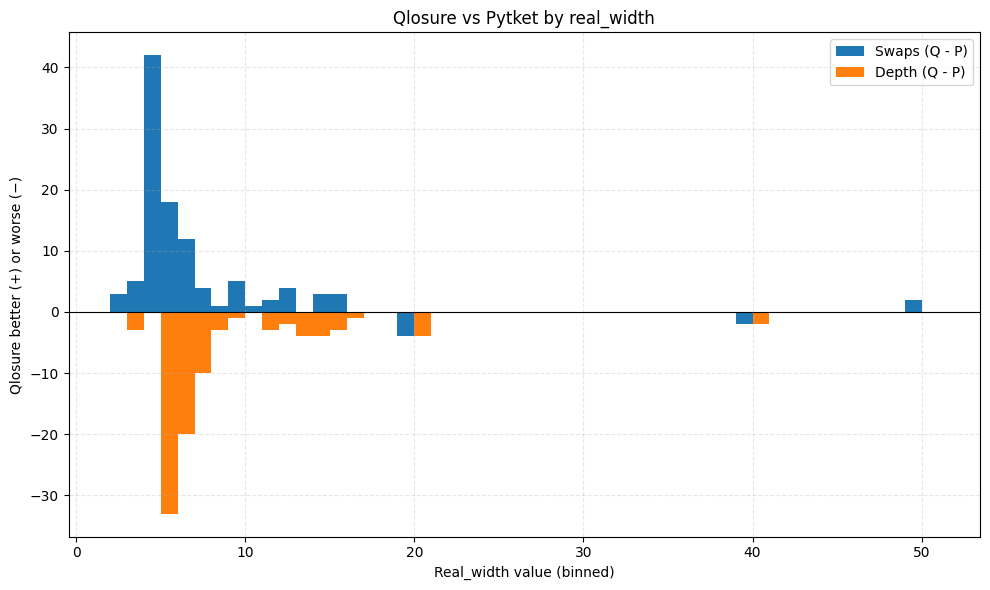

In [ ]:
plot_q_vs_p_by_metric(results, metric='real_width')   # or 'avg', 'max'

In [ ]:
#plot_comparison(qlosure_path, pytket_path)

In [ ]:
from pytket.circuit.display import render_circuit_jupyter
#render_circuit_jupyter(pytket_results["circ"])

In [ ]:
def elemenat_circuit(circ,lim):
    sub_circ = QuantumCircuit(lim)
    for instr, qargs, cargs in circ.data:
        qubit_indices = [circ.qubits.index(q) for q in qargs]
        new_qargs = [sub_circ.qubits[idx] for idx in qubit_indices]
        sub_circ.append(instr, new_qargs, cargs)
    return sub_circ

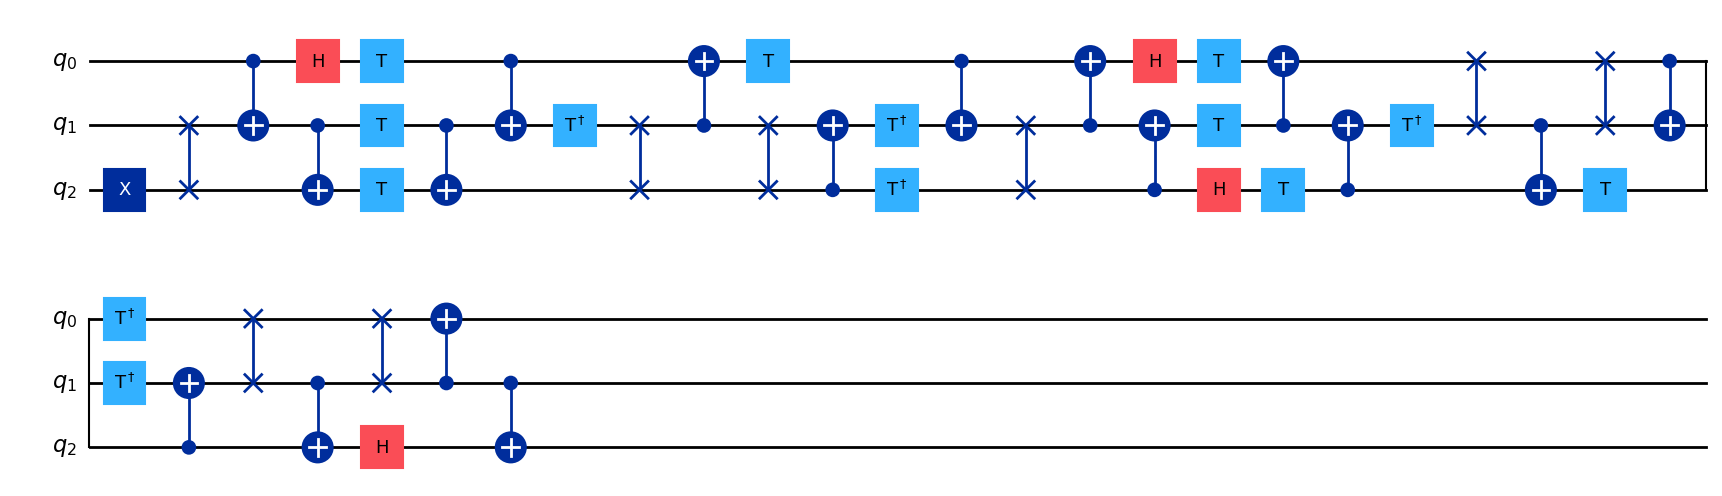

In [ ]:
from pytket.extensions.qiskit import tk_to_qiskit
qiskit_circ = tk_to_qiskit(pytket_results["circ"])
qiskit_circ = elemenat_circuit(qiskit_circ,3)
qiskit_circ.draw(output="mpl")

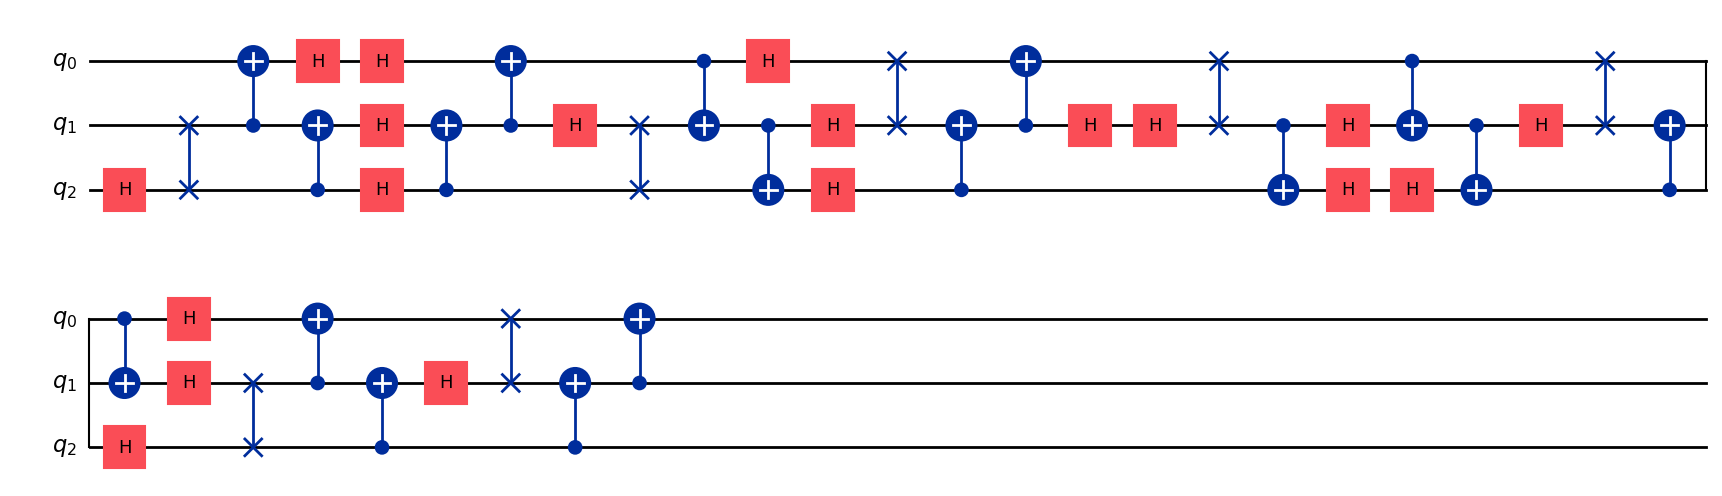

In [ ]:
sabre_circ = elemenat_circuit(poly_mapper.circuit,3)
sabre_circ.draw(output="mpl")

In [ ]:
import islpy as isl
from collections import defaultdict



_schedule = isl.UnionMap("{ S0[1] -> [3]; S0[0] -> [0]; S1[1] -> [4]; S1[0] -> [1]; S2[1] -> [5]; S2[0] -> [2] }")
result = defaultdict(list)

dim_set = isl.dim_type.set
to_str = isl.Val.to_str
to_py =  isl.Val.to_python

def bs_to_key(bs):
    name = bs.get_tuple_name().lower()
    n_dims = bs.dim(dim_set)
    return name 

        
def map_callback(_map):
    def map_to_dict(b):

        def callback(_point) -> None:
            _m = _point.to_set().unwrap()
            domain = to_py(_m.domain().sample_point().get_coordinate_val(dim_set, 0))
            range = bs_to_key(_m.range())
            result[range].append(domain)

        b.foreach_point(callback)

    for b in _map.get_basic_sets():
        map_to_dict(b)


_schedule.reverse().wrap().foreach_set(map_callback)

print(result)

defaultdict(<class 'list'>, {'s2': [5, 2], 's0': [3, 0], 's1': [4, 1]})


In [ ]:
from qiskit import QuantumCircuit

# Your DAG edges as (control, target) pairs
edges = [
    (0, 2),  # gate 0: q0 → q2
    (1, 5),  # gate 1: q1 → q5
    (0, 3),  # gate 2: q0 → q7
    (1, 2),  # gate 3: q1 → q2
    (5, 6),  # gate 4: q5 → q6
    (0, 7),  # gate 5: q0 → q5
    (2, 4),  # gate 6: q2 → q4
    (1, 6),  # gate 7: q1 → q6
]

qc = QuantumCircuit(8)
for ctrl, tgt in edges:
    qc.cx(ctrl, tgt)


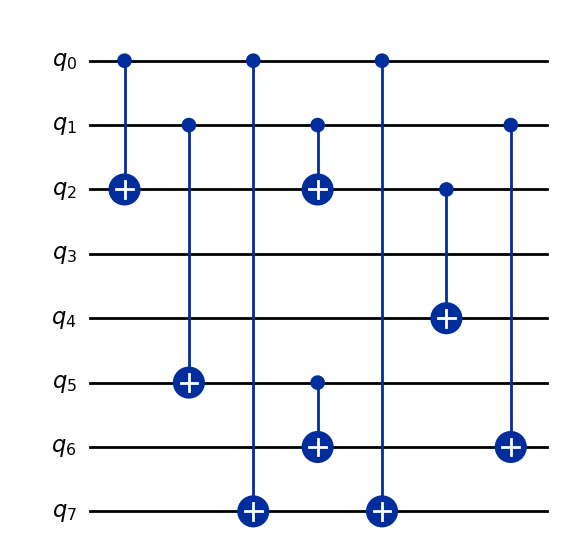

In [ ]:
qc.draw(output="mpl")

In [ ]:
from qiskit.converters import circuit_to_dag

dag = circuit_to_dag(qc)


In [ ]:
from qiskit.visualization import dag_drawer

# This returns a matplotlib figure of the DAG
fig = dag_drawer(dag, scale=0.8)
fig.show()


In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))


from src.qlosure.utils.isl_data_loader import json_file_to_isl
from src.qlosure.mapping.routing import POLY_QMAP


file_path = "../benchmarks/polyhedral/cases/st.json"
data = json_file_to_isl(file_path)


edges = [[0,1],[0,3],[1,2],[1,4],[2,4],[2,5],[3,4],[4,5],[3,6],[4,6],[4,7],[5,8],[6,7],[7,8]]

In [ ]:
poly_mapper = POLY_QMAP(edges, data,with_circuit=True)
qlosure_results = poly_mapper.run(initial_mapping_method="trivial",heuristic_method="layered_closure_heuristic",verbose=1)
qlosure_results

(4, 9)

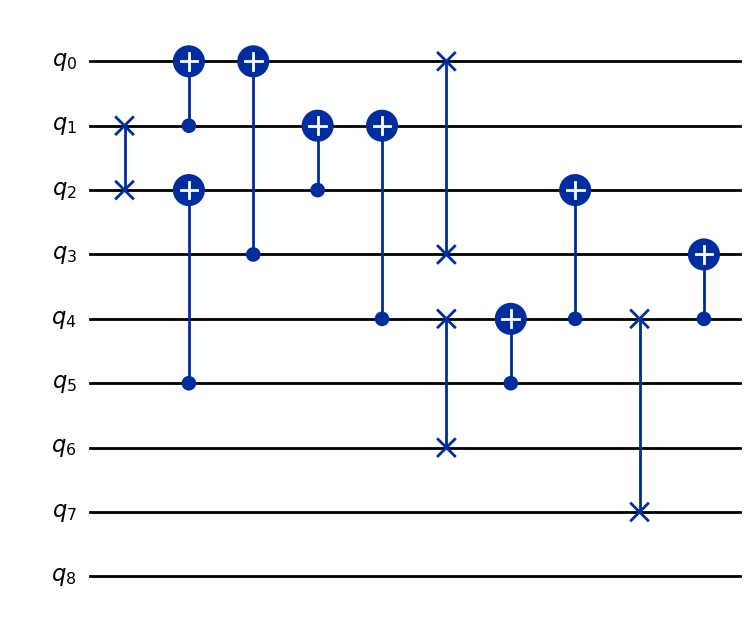

In [ ]:
poly_mapper.circuit.draw(output="mpl")

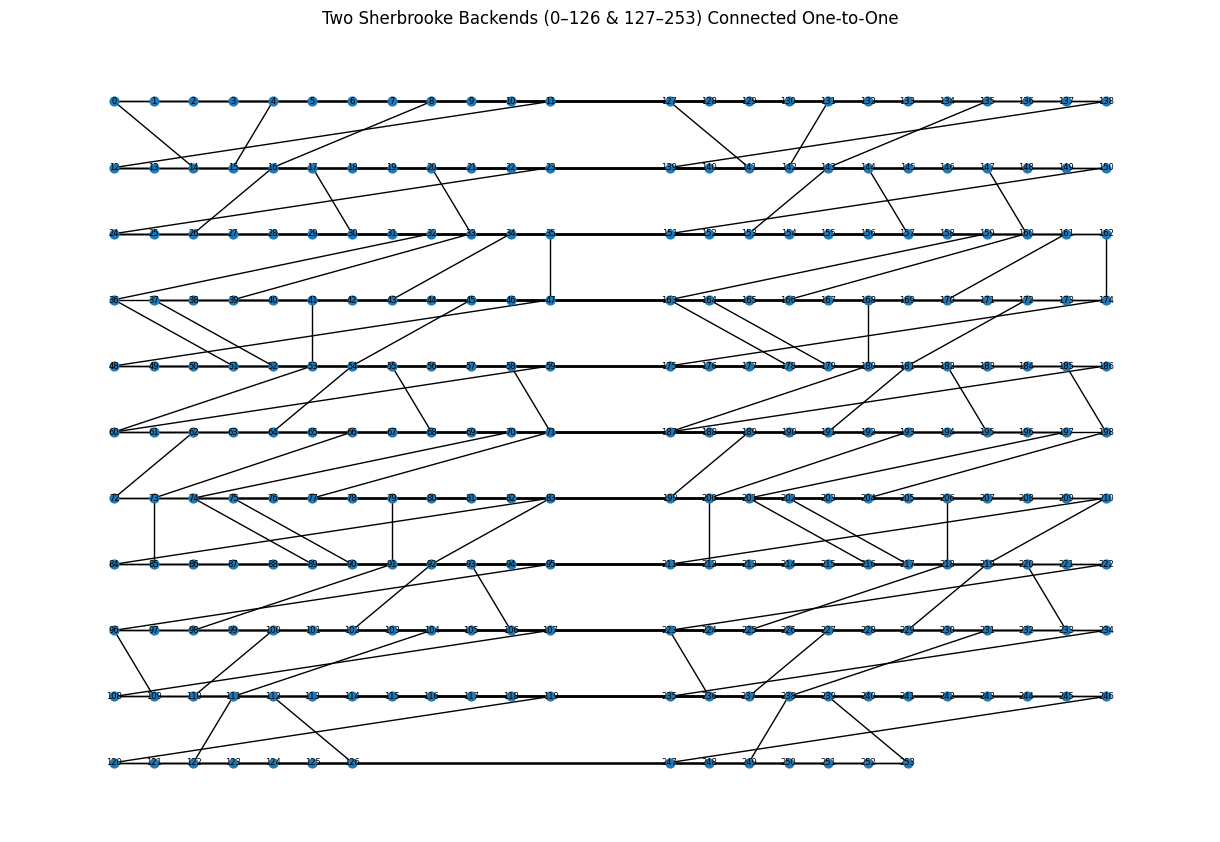

     Qubit1  Qubit2
0         0       1
1         0      14
2         0     127
3         1       2
4         1     128
..      ...     ...
406     248     249
407     249     250
408     250     251
409     251     252
410     252     253

[411 rows x 2 columns]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from qiskit.providers.fake_provider import Fake127QPulseV1
from qiskit.transpiler import CouplingMap

# 1. Load the two Sherbrooke backends
b = Fake127QPulseV1()
n = b.configuration().n_qubits   # should be 127

# 2. Extract the undirected edge set of Sherbrooke
base_edges = {tuple(sorted(e)) for e in b.configuration().coupling_map}

# 3. Build two offset copies
edges_left  = base_edges
edges_right = {(u+n, v+n) for (u, v) in base_edges}

# 4. Add “bridge” edges connecting i ↔ i+n for i=0…n−1
bridge_edges = {(i, i+n) for i in range(n)}

# 5. Combine all edges
all_edges = sorted(edges_left | edges_right | bridge_edges)

# 6. Create & draw the graph
G = nx.Graph()
G.add_edges_from(all_edges)

# 7. Compute a 2D layout:
#    - left copy at x = 0…11, right copy shifted by +14
cols = 12
gap  = 2
pos = {}
for q in G.nodes():
    copy_index = q // n           # 0 for left, 1 for right
    local_id   = q % n
    x = (local_id % cols) + copy_index*(cols+gap)
    y = local_id // cols
    pos[q] = (x, -y)              # negative y so row 0 is at top

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=40, with_labels=True, font_size=6)
plt.title("Two Sherbrooke Backends (0–126 & 127–253) Connected One-to-One")
plt.axis('off')
plt.show()

# 8. (Optional) Tabulate the edge list
df = pd.DataFrame(all_edges, columns=["Qubit1", "Qubit2"])
print(df)


In [ ]:
# 1. Imports
from qiskit.providers.fake_provider import Fake127QPulseV1, GenericBackendV2
from qiskit.transpiler import CouplingMap
from qiskit.visualization import plot_gate_map
import matplotlib.pyplot as plt

# 2. Instantiate the 127-qubit fake backend
fake = Fake127QPulseV1()
n = fake.configuration().n_qubits   # should be 127

# 3. Grab its undirected coupling edges
base_edges = {tuple(sorted(edge)) for edge in fake.configuration().coupling_map}

# 4. Build the left copy (0–126), the right copy (127–253), and one-to-one bridges
edges_left   = base_edges
edges_right  = {(u + n, v + n) for u, v in base_edges}
bridge_edges = {(i, i + n) for i in range(n)}

# 5. Combine all edges into one list
all_edges = sorted(edges_left | edges_right | bridge_edges)

# 6. Make a CouplingMap and wrap it in a GenericBackendV2
cmap = CouplingMap(all_edges)
super_backend = GenericBackendV2(num_qubits=2*n, coupling_map=cmap)


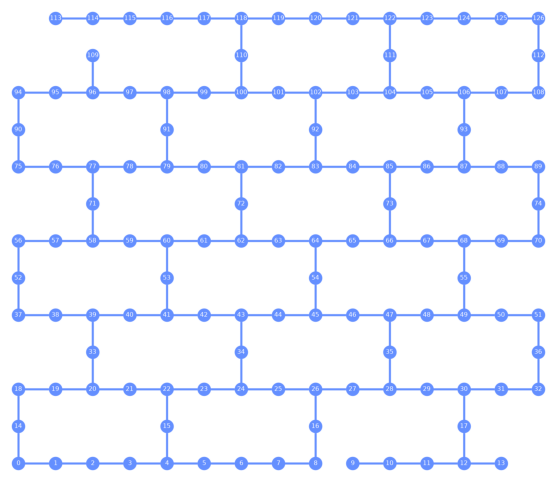

In [ ]:
from qiskit.providers.fake_provider import Fake127QPulseV1
from qiskit.visualization import plot_gate_map

# Get the fake backend
fake_backend = Fake127QPulseV1()

# Plot the gate map
plot_gate_map(fake_backend, figsize=(8, 6))

In [ ]:
n = fake_backend.configuration().n_qubits

In [ ]:
base_edges = {tuple(sorted(edge)) for edge in fake.configuration().coupling_map}
added_edges = {(109, 114),(8,9),(109+n, 114+n),(8+n,9+n),(13,254),(240,255),(254,127),(32,127+18),(51,37+127),(70,127+56),(89,127+75),(108,127+94),(126,255)}
right_edges = {(u + n, v + n) for u, v in base_edges}

In [ ]:
edges = sorted(edges_left | added_edges | right_edges)

In [ ]:
cmap = CouplingMap(edges)
super_backend = GenericBackendV2(num_qubits=256, coupling_map=cmap)

In [ ]:
cmap.get_edges()

EdgeList[(0, 1), (0, 14), (1, 2), (2, 3), (3, 4), (4, 5), (4, 15), (5, 6), (6, 7), (7, 8), (8, 9), (8, 16), (9, 10), (10, 11), (11, 12), (12, 13), (12, 17), (13, 254), (14, 18), (15, 22), (16, 26), (17, 30), (18, 19), (19, 20), (20, 21), (20, 33), (21, 22), (22, 23), (23, 24), (24, 25), (24, 34), (25, 26), (26, 27), (27, 28), (28, 29), (28, 35), (29, 30), (30, 31), (31, 32), (32, 36), (32, 145), (33, 39), (34, 43), (35, 47), (36, 51), (37, 38), (37, 52), (38, 39), (39, 40), (40, 41), (41, 42), (41, 53), (42, 43), (43, 44), (44, 45), (45, 46), (45, 54), (46, 47), (47, 48), (48, 49), (49, 50), (49, 55), (50, 51), (51, 164), (52, 56), (53, 60), (54, 64), (55, 68), (56, 57), (57, 58), (58, 59), (58, 71), (59, 60), (60, 61), (61, 62), (62, 63), (62, 72), (63, 64), (64, 65), (65, 66), (66, 67), (66, 73), (67, 68), (68, 69), (69, 70), (70, 74), (70, 183), (71, 77), (72, 81), (73, 85), (74, 89), (75, 76), (75, 90), (76, 77), (77, 78), (78, 79), (79, 80), (79, 91), (80, 81), (81, 82), (82, 83),

In [ ]:
import json
data_to_save = {
    "backend_name": "Ibm_256",
    "coupling_map": list(cmap.get_edges())
}

# Specify the filename for the JSON file
filename = "IBM_256.json"

# Save the data to the JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f, indent=4)

print(f"Coupling map saved to '{filename}'")

Coupling map saved to 'IBM_256.json'


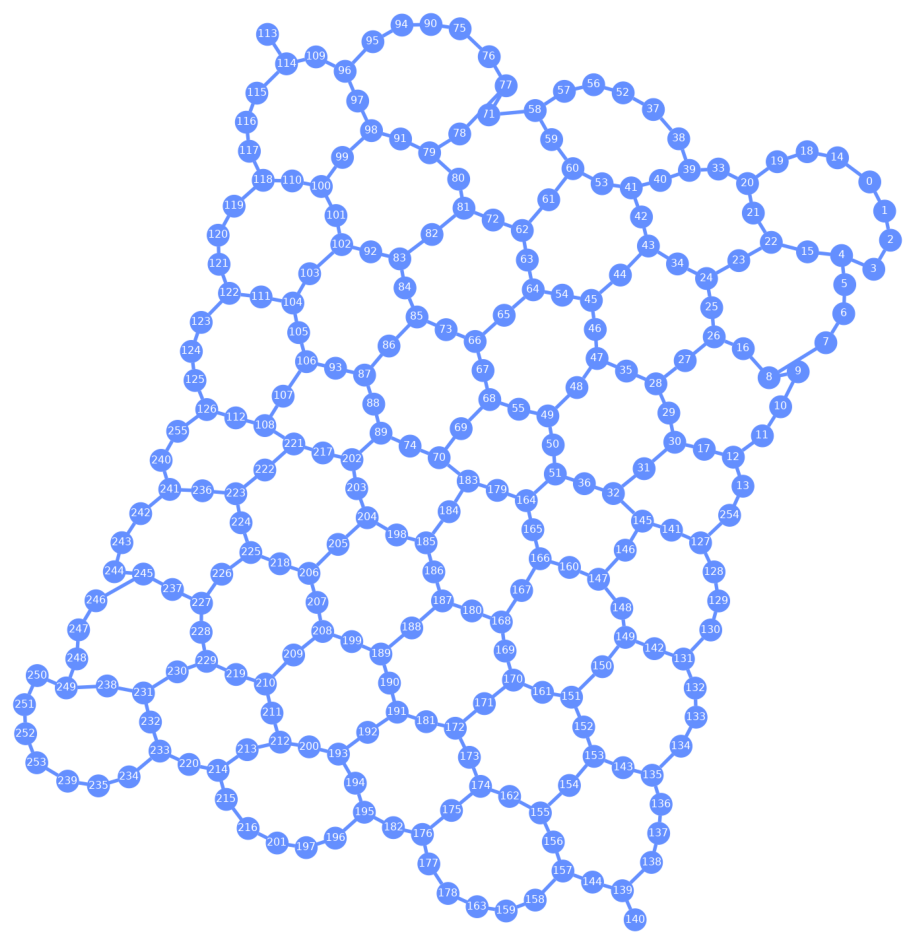

In [ ]:
plot_gate_map(super_backend, figsize=(16, 12))

In [ ]:
INDEX_CONNECTION_LIST = {"Ourense": [(0, 1), (1, 2), (1, 3), (3, 4)],
                       "Sycamore": [(0, 6), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 10), (5, 10), (5, 11),
                                    (6, 12), (6, 13), (7, 13), (7, 14), (8, 14), (8, 15), (9, 15), (9, 16), (10, 16), (10, 17), (11, 17),
                                    (12, 18), (13, 18), (13, 19), (14, 19), (14, 20), (15, 20), (15, 21), (16, 21), (16, 22), (17, 22), (17, 23),
                                    (18, 24), (18, 25), (19, 25), (19, 26), (20, 26), (20, 27), (21, 27), (21, 28), (22, 28), (22, 29), (23, 29),
                                    (24, 30), (25, 30), (25, 31), (26, 31), (26, 32), (27, 32), (27, 33), (28, 33), (28, 34), (29, 34), (29, 35),
                                    (30, 36), (30, 37), (31, 37), (31, 38), (32, 38), (32, 39), (33, 39), (33, 40), (34, 40), (34, 41), (35, 41),
                                    (36, 42), (37, 42), (37, 43), (38, 43), (38, 44), (39, 44), (39, 45), (40, 45), (40, 46), (41, 46), (41, 47),
                                    (42, 48), (42, 49), (43, 49), (43, 50), (44, 50), (44, 51), (45, 51), (45, 52), (46, 52), (46, 53), (47, 53)],
                       "Rochester": [(0, 1), (1, 2), (2, 3), (3, 4),
                                     (0, 5), (4, 6), (5, 9), (6, 13),
                                     (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15),
                                     (7, 16), (11, 17), (15, 18), (16, 19), (17, 23), (18, 27),
                                     (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27),
                                     (21, 28), (25, 29), (28, 32), (29, 36),
                                     (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38),
                                     (30, 39), (34, 40), (38, 41), (39, 42), (40, 46), (41, 50),
                                     (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50),
                                     (44, 51), (48, 52)],
                       "Tokyo": [(0, 1), (1, 2), (2, 3), (3, 4),
                                 (0, 5), (1, 6), (1, 7), (2, 6), (2, 7), (3, 8), (3, 9), (4, 8), (4, 9),
                                 (5, 6), (6, 7), (7, 8), (8, 9),
                                 (5, 10), (5, 11), (6, 10), (6, 11), (7, 12), (7, 13), (8, 12), (8, 13), (9, 14),
                                 (10, 11), (11, 12), (12, 13), (13, 14),
                                 (10, 15), (11, 16), (11, 17), (12, 16), (12, 17), (13, 18), (13, 19), (14, 18), (14, 19),
                                 (15, 16), (16, 17), (17, 18), (18, 19)],
                       "Aspen-4": [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
                                   (0, 8), (3, 11), (4, 12), (7, 15),
                                   (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15)]
                       }

In [ ]:

coupling_map = INDEX_CONNECTION_LIST["Aspen-4"]
print(f"Rigetti Aspen‑4 edges: {coupling_map}")


Rigetti Aspen‑4 edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (0, 8), (3, 11), (4, 12), (7, 15), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15)]


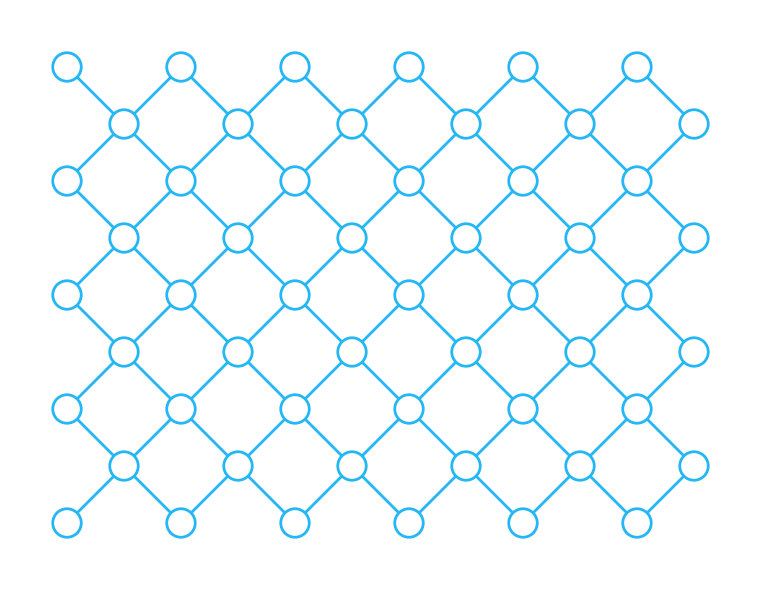

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches

# ─── 1) YOUR DATA ────────────────────────────────────────────────────────────────

# 1a) Node positions: { node_id: (x, y), ... }
positions = {
    i: (((i % 6)*2 + 1) if i//6 % 2 == 1 else (i % 6)*2, i // 6)
    for i in range(54)
}

# 1b) Edges between nodes: [ (u, v), ... ]
edges = []

for i, (x, y) in positions.items():
    if y % 2 == 1: 
        for j, (x2, y2) in positions.items():
            if (abs(y2 - y )== 1) and (abs(x2 - x) == 1):  
                edges.append((i, j))


# ─── 2) STYLE PARAMETERS ────────────────────────────────────────────────────────

r_normal   = 0.25
edge_color = '#25b6f5'
edge_width = 2
node_fc    = 'white'
node_ec    = '#25b6f5'
node_lw    = 2

# 3) PLOT
fig, ax = plt.subplots(figsize=(8,6))

# draw edges
for u,v in edges:
    x1,y1 = positions[u]
    x2,y2 = positions[v]
    ax.plot([x1,x2], [y1,y2],
            color=edge_color, linewidth=edge_width, zorder=2)

# draw nodes (without labels)
for node, (x,y) in positions.items():
    circ = patches.Circle((x,y), radius=r_normal,
                          facecolor=node_fc,
                          edgecolor=node_ec,
                          lw=node_lw,
                          zorder=2)
    ax.add_patch(circ)

# finalize plot
all_x = [x for x,y in positions.values()]
all_y = [y for x,y in positions.values()]
xmin, xmax = min(all_x)-1, max(all_x)+1
ymin, ymax = min(all_y)-1, max(all_y)+1

ax.set_aspect('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.axis('off')
plt.tight_layout()
plt.show()


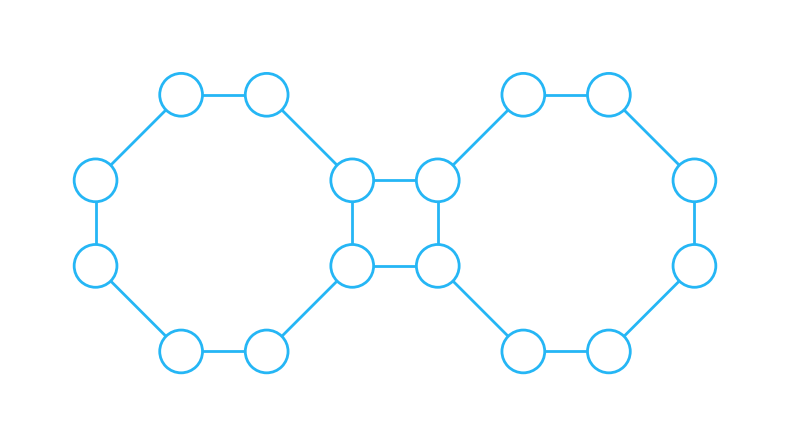

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches

# ─── 1) YOUR DATA ────────────────────────────────────────────────────────────────

# 1a) Node positions: { node_id: (x, y), ... }
positions = {
    0: (1, 0), 1: (2, 0), 2: (5, 0), 3: (6, 0),
    4: (0, 1), 5: (3, 1), 6: (4, 1), 7: (7, 1),
    8: (0, 2), 9: (3, 2), 10: (4, 2), 11: (7, 2),
    12: (1, 3), 13: (2, 3), 14: (5, 3), 15: (6, 3)
}


# 1b) Edges between nodes: [ (u, v), ... ]
edges = [
    (0,1),
    (2,3),
    (0,4),
    (1,5),
    (5,6),
    (6,2),
    (3,7),
    (4,8),
    (5,9),
    (6,10),
    (7,11),
    (8,12),
    (9,13),
    (9,10),
    (10,14),
    (11,15),
    (12,13),
    (14,15)
]



# ─── 2) STYLE PARAMETERS ────────────────────────────────────────────────────────

r_normal   = 0.25
edge_color = '#25b6f5'
edge_width = 2
node_fc    = 'white'
node_ec    = '#25b6f5'
node_lw    = 2

# 3) PLOT
fig, ax = plt.subplots(figsize=(8,6))

# draw edges
for u,v in edges:
    x1,y1 = positions[u]
    x2,y2 = positions[v]
    ax.plot([x1,x2], [y1,y2],
            color=edge_color, linewidth=edge_width, zorder=2)

# draw nodes (without labels)
for node, (x,y) in positions.items():
    circ = patches.Circle((x,y), radius=r_normal,
                          facecolor=node_fc,
                          edgecolor=node_ec,
                          lw=node_lw,
                          zorder=2)
    ax.add_patch(circ)

# finalize plot
all_x = [x for x,y in positions.values()]
all_y = [y for x,y in positions.values()]
xmin, xmax = min(all_x)-1, max(all_x)+1
ymin, ymax = min(all_y)-1, max(all_y)+1

ax.set_aspect('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
positions

{0: (0, 0),
 1: (2, 0),
 2: (4, 0),
 3: (6, 0),
 4: (8, 0),
 5: (10, 0),
 6: (1, 1),
 7: (3, 1),
 8: (5, 1),
 9: (7, 1),
 10: (9, 1),
 11: (11, 1),
 12: (0, 2),
 13: (2, 2),
 14: (4, 2),
 15: (6, 2),
 16: (8, 2),
 17: (10, 2),
 18: (1, 3),
 19: (3, 3),
 20: (5, 3),
 21: (7, 3),
 22: (9, 3),
 23: (11, 3),
 24: (0, 4),
 25: (2, 4),
 26: (4, 4),
 27: (6, 4),
 28: (8, 4),
 29: (10, 4),
 30: (1, 5),
 31: (3, 5),
 32: (5, 5),
 33: (7, 5),
 34: (9, 5),
 35: (11, 5),
 36: (0, 6),
 37: (2, 6),
 38: (4, 6),
 39: (6, 6),
 40: (8, 6),
 41: (10, 6),
 42: (1, 7),
 43: (3, 7),
 44: (5, 7),
 45: (7, 7),
 46: (9, 7),
 47: (11, 7),
 48: (0, 8),
 49: (2, 8),
 50: (4, 8),
 51: (6, 8),
 52: (8, 8),
 53: (10, 8)}

In [ ]:
edges

[(6, 0),
 (6, 1),
 (6, 12),
 (6, 13),
 (7, 1),
 (7, 2),
 (7, 13),
 (7, 14),
 (8, 2),
 (8, 3),
 (8, 14),
 (8, 15),
 (9, 3),
 (9, 4),
 (9, 15),
 (9, 16),
 (10, 4),
 (10, 5),
 (10, 16),
 (10, 17),
 (11, 5),
 (11, 17),
 (18, 12),
 (18, 13),
 (18, 24),
 (18, 25),
 (19, 13),
 (19, 14),
 (19, 25),
 (19, 26),
 (20, 14),
 (20, 15),
 (20, 26),
 (20, 27),
 (21, 15),
 (21, 16),
 (21, 27),
 (21, 28),
 (22, 16),
 (22, 17),
 (22, 28),
 (22, 29),
 (23, 17),
 (23, 29),
 (30, 24),
 (30, 25),
 (30, 36),
 (30, 37),
 (31, 25),
 (31, 26),
 (31, 37),
 (31, 38),
 (32, 26),
 (32, 27),
 (32, 38),
 (32, 39),
 (33, 27),
 (33, 28),
 (33, 39),
 (33, 40),
 (34, 28),
 (34, 29),
 (34, 40),
 (34, 41),
 (35, 29),
 (35, 41),
 (42, 36),
 (42, 37),
 (42, 48),
 (42, 49),
 (43, 37),
 (43, 38),
 (43, 49),
 (43, 50),
 (44, 38),
 (44, 39),
 (44, 50),
 (44, 51),
 (45, 39),
 (45, 40),
 (45, 51),
 (45, 52),
 (46, 40),
 (46, 41),
 (46, 52),
 (46, 53),
 (47, 41),
 (47, 53)]

In [21]:
import matplotlib.pyplot as plt
from matplotlib import patches

# 1) PARAMETERS
n_rows, n_cols = 13, 15  # grid dimensions
r_normal = 0.25
edge_color = '#25b6f5'
edge_width = 2
node_fc = 'white'
node_ec = '#25b6f5'
node_lw = 2
label_fontsize = 10

# 2) GENERATE GRID POSITIONS
positions = {i: (i % n_cols, i // n_cols) for i in range(n_rows * n_cols)}

# 3) GENERATE EDGES (4-neighborhood)
edges = []
for i in range(n_rows * n_cols):
    x, y = positions[i]
    neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
    for nx, ny in neighbors:
        if 0 <= nx < n_cols and 0 <= ny < n_rows:
            j = ny * n_cols + nx
            if j > i:
                edges.append((i, j))



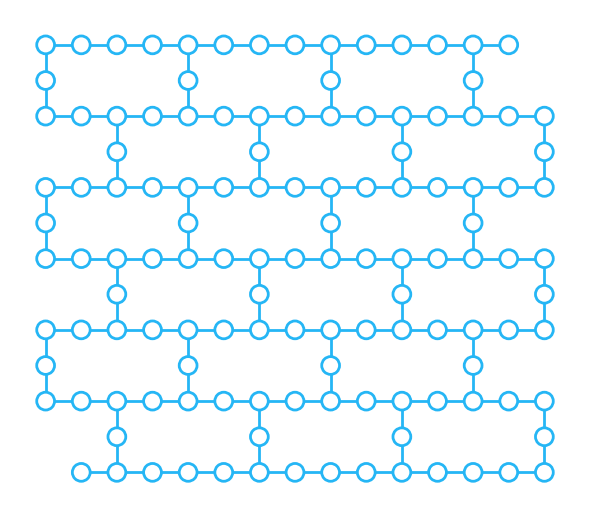

In [59]:
# … after you’ve built `positions` and `filtered_edges` …
remove_nodes = [0,16,15,20,18,19,24,22,23,26,27,28,46,47,48,50,51,52,54,55,56,58,59,75,76,78,79,80,82,83,84,86,87,88,
                106,107,108,110,111,112,114,115,116,118,119,135,136,138,139,140,142,143,144,146,147,148,
                166,167,168,170,171,172,174,175,176,178,179,194]
filtered_edges = [(u, v) for u, v in edges if u not in remove_nodes and v not in remove_nodes]

fig, ax = plt.subplots(figsize=(6, 8))

# draw only the filtered edges:
for u, v in filtered_edges:
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    ax.plot([x1, x2], [y1, y2],
            color=edge_color, linewidth=edge_width, zorder=2)

# draw all nodes, but highlight removed ones in grey
for node, (x, y) in positions.items():
    if node in remove_nodes:
        continue
    else:
        fc, ec, lw = node_fc, node_ec, node_lw

    circ = patches.Circle((x, y), radius=r_normal,
                          facecolor=fc,
                          edgecolor=ec,
                          lw=lw,
                          zorder=2)
    ax.add_patch(circ)
    #ax.text(x, y, str(node), ha='center', va='center',
    #        fontsize=label_fontsize, zorder=3)

ax.set_aspect('equal')
all_x = [x for x,y in positions.values()]
all_y = [y for x,y in positions.values()]
ax.set_xlim(min(all_x)-1, max(all_x)+1)
ax.set_ylim(min(all_y)-1, max(all_y)+1)
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
extra = [(194, 375), (164, 345),(134,315),(104,285),(74,255),(44,225)]

FINAL PLOT STATISTICS:
Total Nodes: 256
  - Original graph nodes: 128
  - Offset graph nodes: 128
Total Edges: 297
  - Original graph edges: 145
  - Offset graph edges: 145
  - Cross-graph edges: 7


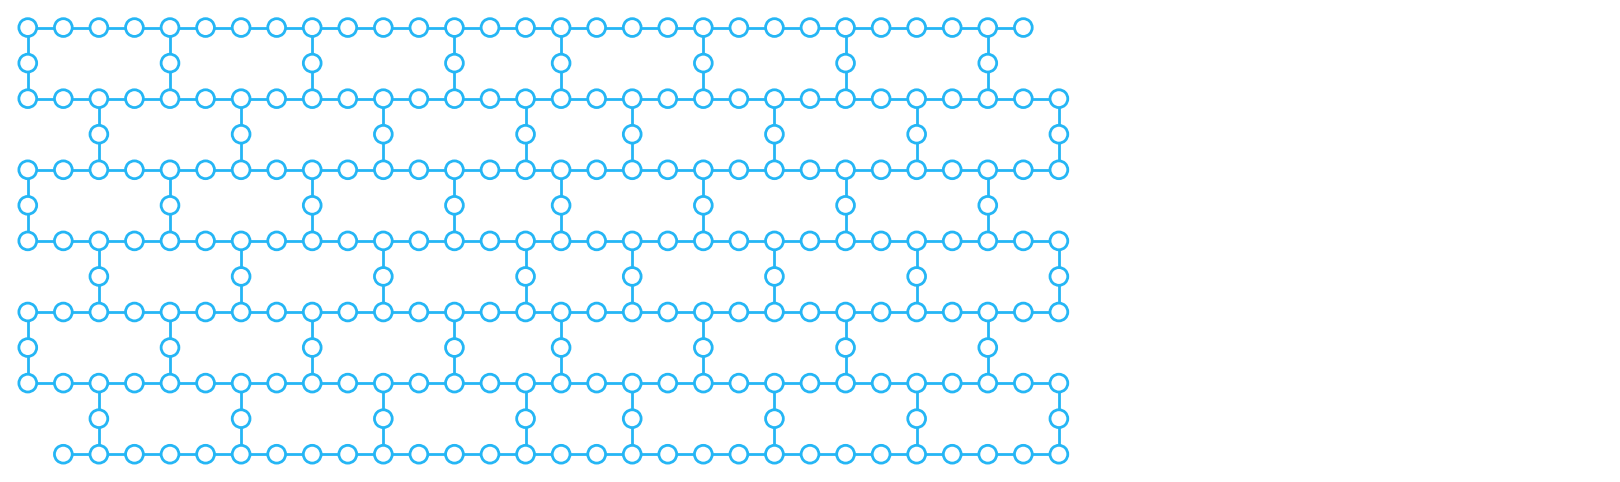

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
from matplotlib import patches

# PARAMETERS
n_rows, n_cols = 13, 15
r = 0.25
edge_color = '#25b6f5'
new_edge_color = '#f54291'
cross_edge_color = '#34a853'
edge_width = 2
node_fc = 'white'
node_ec = '#25b6f5'
node_lw = 2
fontsize = 8

# ORIGINAL POSITIONS
positions = {i: (i % n_cols, i // n_cols) for i in range(n_rows * n_cols)}

# GRID EDGES (4-neighbors)
edges = []
for i, (x, y) in positions.items():
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < n_cols and 0 <= ny < n_rows:
            j = ny * n_cols + nx
            if j > i:
                edges.append((i, j))

# FILTER NODES/EDGES
removed = {
    16,15,20,18,19,24,22,23,26,27,28,46,47,48,50,51,52,54,55,56,58,59,
    75,76,78,79,80,82,83,84,86,87,88,106,107,108,110,111,112,114,115,116,
    118,119,135,136,138,139,140,142,143,144,146,147,148,166,167,168,170,
    171,172,174,175,176,178,179
}
filtered = [(u, v) for u, v in edges if u not in removed and v not in removed]

# CREATE OFFSET COPIES
label_offset = max(positions.keys()) + 1 # e.g., 195
axis_offset = (15, 0)

# New positions dict including both graphs
all_positions = positions.copy()
for orig, (x, y) in positions.items():
    if orig in removed:
        continue
    new_id = orig + label_offset
    all_positions[new_id] = (x + axis_offset[0], y + axis_offset[1])

# New edges within offset graph
# OPTIONAL: cross-graph edges between original and offset
cross_edges = [(194, 375), (164, 345),(134,315),(104,285),(74,255),(44,225),(14,195)]
nodes_to_remove = [0,389]
filtered = [(u, v) for u, v in filtered if u not in nodes_to_remove and v not in nodes_to_remove]
new_edges = [(u + label_offset, v + label_offset) for u, v in filtered]
new_edges = [(u, v) for u, v in new_edges if u not in nodes_to_remove and v not in nodes_to_remove]
new_edges.append((195, 196))
# PLOT COMBINED GRAPH - ABSOLUTELY NO MARGINS
fig = plt.figure(figsize=(16, 16))
ax = fig.add_axes([0, 0, 1, 1])  # This forces axes to fill entire figure

# Draw original edges
for u, v in filtered:
    x1, y1 = positions[u]; x2, y2 = positions[v]
    ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=edge_width)

# Draw new edges
for u, v in new_edges:
    x1, y1 = all_positions[u]; x2, y2 = all_positions[v]
    ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=edge_width)

# Draw cross edges
for u, v in cross_edges:
    if u in positions and v in all_positions:
        x1, y1 = positions[u]; x2, y2 = all_positions[v]
        ax.plot([x1, x2], [y1, y2], color=edge_color, linewidth=edge_width)

# Draw all nodes
for node, (x, y) in all_positions.items():
    # skip removed originals
    if node < label_offset and node in removed or node in nodes_to_remove:
        continue
    circ = patches.Circle((x, y), r, facecolor=node_fc, edgecolor=node_ec, lw=node_lw, zorder=2)
    ax.add_patch(circ)
    #ax.text(x, y, str(node), ha='center', va='center', fontsize=fontsize, zorder=3)

# Set exact boundaries with no padding
ax.set_aspect('equal')
ax.set_xlim(-0.5, n_cols*2 + axis_offset[0] - 0.5)
ax.set_ylim(-0.5, n_rows - 0.5)
ax.axis('off')
# Ensure no margins at all
plt.margins(0, 0)
ax.margins(0, 0)

# COUNT NODES AND EDGES IN FINAL PLOT
# Count nodes (excluding removed ones)
original_nodes = set(positions.keys()) - removed - set(nodes_to_remove)
offset_nodes = set(range(label_offset, label_offset + len(positions))) - set(nodes_to_remove) - {n + label_offset for n in removed}
total_nodes = len(original_nodes) + len(offset_nodes)

# Count edges
original_edges = len(filtered)
new_graph_edges = len(new_edges) 
cross_graph_edges = len(cross_edges)
total_edges = original_edges + new_graph_edges + cross_graph_edges

print(f"FINAL PLOT STATISTICS:")
print(f"Total Nodes: {total_nodes}")
print(f"  - Original graph nodes: {len(original_nodes)}")
print(f"  - Offset graph nodes: {len(offset_nodes)}")
print(f"Total Edges: {total_edges}")
print(f"  - Original graph edges: {original_edges}")
print(f"  - Offset graph edges: {new_graph_edges}")
print(f"  - Cross-graph edges: {cross_graph_edges}")

plt.show()
plt.savefig('graph.png')


In [113]:
# Count nodes: originals minus removed + offset copies
original_nodes = [i for i in positions if i not in removed]
offset_nodes = [i + label_offset for i in original_nodes]
all_nodes = set(original_nodes + offset_nodes)

# Count edges: filtered original + new_edges + cross_edges
all_edges = set(filtered + new_edges + cross_edges)

# Display counts
print(f"Number of nodes in the final plot: {len(all_nodes)}")
print(f"Number of edges in the final plot: {len(all_edges)}")


Number of nodes in the final plot: 258
Number of edges in the final plot: 296


In [117]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
# 1) LOAD JSON FROM FILE
with open('../topologies/IBM_256.json', 'r') as f:
    data = json.load(f)

backend_name = data.get('backend_name', 'Coupling Map')
coupling = data['coupling_map']


In [118]:
len(coupling)

297

In [64]:
adj = defaultdict(list)
for u, v in coupling:
    adj[u].append(v)
    adj[v].append(u)

# 3) FUNCTION TO GET NEIGHBORS
def get_neighbors(node):
    return adj.get(node, [])

# 4) EXAMPLE USAGE
node_to_query = 141
neighbors = get_neighbors(node_to_query)

print(f"Neighbors of node {node_to_query}: {neighbors}")

Neighbors of node 141: [127, 145]


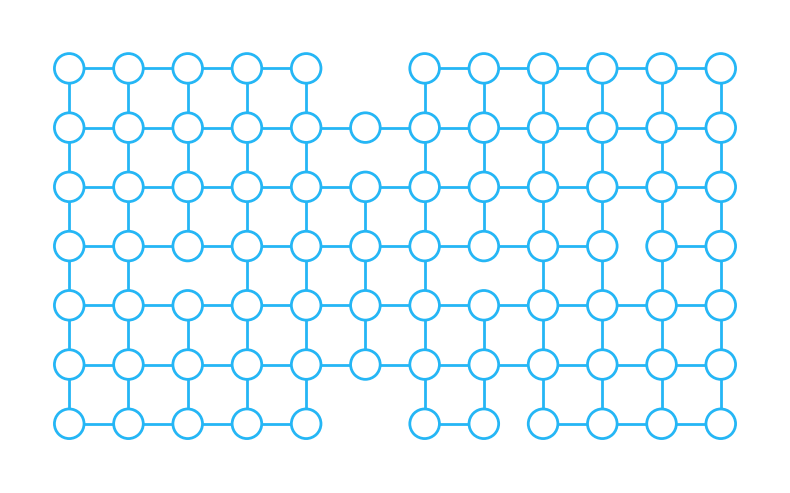

In [138]:
import matplotlib.pyplot as plt
from matplotlib import patches

# 1) PARAMETERS
n_rows, n_cols = 7, 12  # grid dimensions
r_normal = 0.25
edge_color = '#25b6f5'
edge_width = 2
node_fc = 'white'
node_ec = '#25b6f5'
node_lw = 2
label_fontsize = 10

# 2) GENERATE GRID POSITIONS
positions = {i: (i % n_cols, i // n_cols) for i in range(n_rows * n_cols)}

# 3) GENERATE EDGES (4-neighborhood)
edges = []
for i in range(n_rows * n_cols):
    x, y = positions[i]
    neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
    for nx, ny in neighbors:
        if 0 <= nx < n_cols and 0 <= ny < n_rows:
            j = ny * n_cols + nx
            if j > i:
                edges.append((i, j))
                
# … after you’ve built `positions` and `filtered_edges` …
remove_nodes = [5,77]
filtered_edges = [(u, v) for u, v in edges if u not in remove_nodes and v not in remove_nodes]

fig, ax = plt.subplots(figsize=(8, 8))
removed_edges = [(26,38),(7,8),(31,43),(45,46),(53,65)]
# draw only the filtered edges:
for u, v in filtered_edges:
    if (u,v) in removed_edges:
        continue
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    ax.plot([x1, x2], [y1, y2],
            color=edge_color, linewidth=edge_width, zorder=2)

# draw all nodes, but highlight removed ones in grey
for node, (x, y) in positions.items():
    if node in remove_nodes:
        continue
    else:
        fc, ec, lw = node_fc, node_ec, node_lw

    circ = patches.Circle((x, y), radius=r_normal,
                          facecolor=fc,
                          edgecolor=ec,
                          lw=lw,
                          zorder=2)
    ax.add_patch(circ)
    #ax.text(x, y, str(node), ha='center', va='center',
    #        fontsize=label_fontsize, zorder=3)

ax.set_aspect('equal')
all_x = [x for x,y in positions.values()]
all_y = [y for x,y in positions.values()]
ax.set_xlim(min(all_x)-1, max(all_x)+1)
ax.set_ylim(min(all_y)-1, max(all_y)+1)
ax.axis('off')
plt.tight_layout()
plt.show()
